In [1]:
# импортируем необходимые библиотеки, классы и функции
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import dtreeviz
from utils import DFOneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# загружаем данные для визуализации работы дерева
example_enc = pd.read_csv('Data/example_enc.csv', sep=';')
example_enc.head()

,job_position,open_account_flg
0,UMN,0
1,UMN,0
2,SPC,0
3,SPC,0
4,SPC,0


In [3]:
# количество уникальных значений
print(example_enc['job_position'].nunique())

18


In [4]:
# избавляемся от редких категорий
example_enc.loc[example_enc['job_position'].value_counts()\
                [example_enc['job_position']].values < 20,
                'job_position'] = 'OTHER'

In [5]:
# выполняем дамми-кодирование
enc = DFOneHotEncoder()
X_ohc = enc.fit_transform(example_enc[['job_position']])
X_ohc.head()

,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_PNV,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


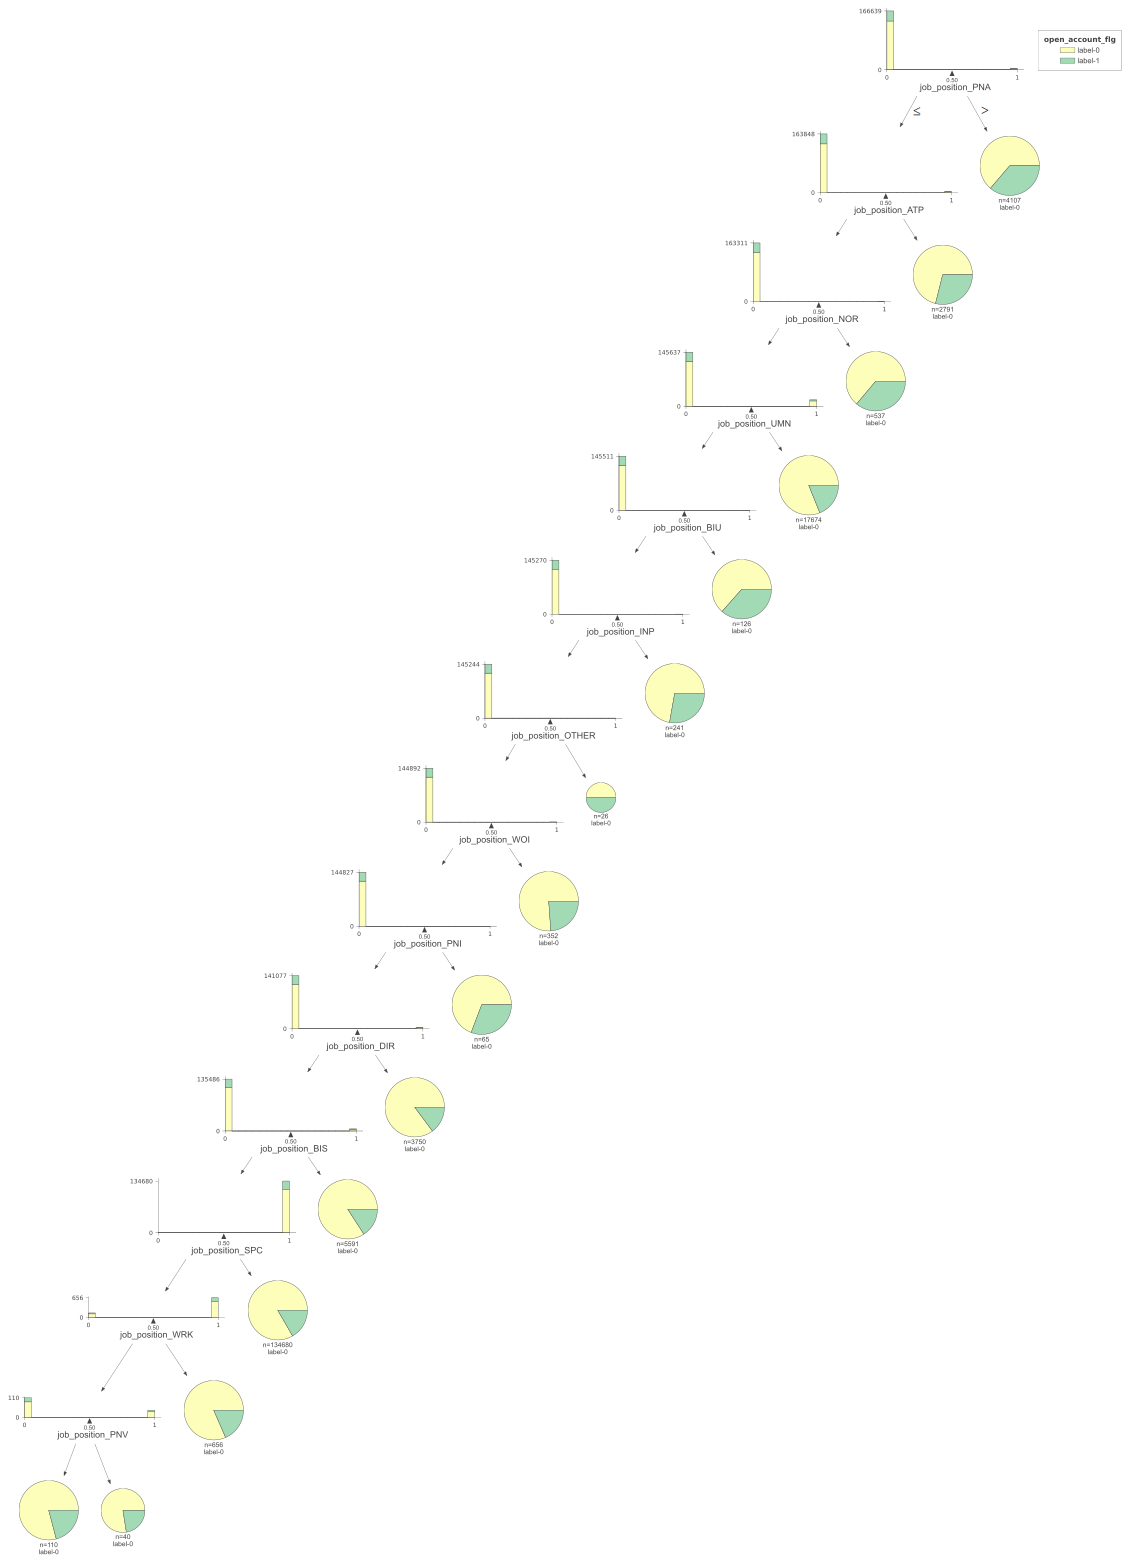

In [6]:
# строим дерево решений
ohc_classifier = DecisionTreeClassifier(random_state=42)
ohc_classifier.fit(X_ohc.values, 
                   example_enc['open_account_flg'].values)
# визуализируем построенное дерево
viz = dtreeviz(
    # модель дерева
    ohc_classifier,
    # массив признаков
    X_ohc,
    # массив меток
    example_enc['open_account_flg'],
    # название зависимой переменной
    target_name='open_account_flg',
    # названия признаков
    feature_names=X_ohc.columns, 
    # метки классов зависимой переменной
    class_names=['label-0', 'label-1'])              
viz

## Дамми-кодирование (One-Hot Encoding)

In [7]:
# импортируем класс OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [8]:
# загружаем данные
tr = pd.read_csv('Data/Stat_FE_train.csv', sep=';')
# выводим наблюдения
tr

,Class,Response
0,A,1
1,A,0
2,A,1
3,A,1
4,B,1
5,B,1
6,B,0
7,C,1
8,C,1


In [9]:
# выполняем дамми-кодирование 
# по методу неполного ранга
dummies_unfull_rank_class = pd.get_dummies(tr['Class'], 
                                           drop_first=False)
dummies_unfull_rank_class

,A,B,C
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,0,1,0
5,0,1,0
6,0,1,0
7,0,0,1
8,0,0,1


In [10]:
# выполняем дамми-кодирование 
# по методу полного ранга
dummies_full_rank_class = pd.get_dummies(tr['Class'], 
                                         drop_first=True)
dummies_full_rank_class

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,1,0
6,1,0
7,0,1
8,0,1


In [11]:
# создаем экземпляр класса OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop=None,
                    handle_unknown='ignore')
# обучаем модель дамми-кодирования - определяем 
# дамми для переменной Class
ohe.fit(tr['Class'].values.reshape(-1, 1))
# выполняем дамми-кодирование переменной Class по методу 
# неполного ранга в обучающем массиве признаков
ohe_train_unfull_rank = ohe.transform(tr['Class'].values.reshape(-1, 1))
ohe_train_unfull_rank

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [12]:
# создаем экземпляр класса OneHotEncoder
ohe = OneHotEncoder(sparse=False, drop='first', 
                    handle_unknown='ignore')
# обучаем модель дамми-кодирования - определяем 
# дамми для переменной Class
ohe.fit(tr['Class'].values.reshape(-1, 1))
# выполняем дамми-кодирование переменной Class по методу 
# полного ранга в обучающем массиве признаков
ohe_train_full_rank = ohe.transform(tr['Class'].values.reshape(-1, 1))
ohe_train_full_rank

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## Кодирование отклонениями, кодирование контрастами сумм (Deviation Encoding, Sum Encoding, Effect Encoding)

In [13]:
# выполняем кодирование контрастами сумм
effects_class = pd.get_dummies(tr['Class']).astype(int)
effects_class = effects_class.iloc[:,:-1]
effects_class.loc[np.all(effects_class == 0, axis=1)] = -1
effects_class

,A,B
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,-1,-1
8,-1,-1


## Присвоение категориям в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding)

In [14]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder
# создаем экземпляр класса LabelEncoder
labelenc = LabelEncoder()

In [15]:
# выполняем Label Encoding
tr['Class_labelenc'] = labelenc.fit_transform(tr['Class'])
tr

,Class,Response,Class_labelenc
0,A,1,0
1,A,0,0
2,A,1,0
3,A,1,0
4,B,1,1
5,B,1,1
6,B,0,1
7,C,1,2
8,C,1,2


In [16]:
# выполняем  Label Encoding для серии с пропуском
s = pd.Series(['Paris', 'Moscow', 'Moscow', np.nan, 'Tokyo'])
labelenc.fit_transform(s)

array([1, 0, 0, 3, 2])

In [17]:
# импортируем функцию murmurhash3_32, генерирующую 
# простую и быструю хеш-функцию MurmurHash2
from sklearn.utils.murmurhash import murmurhash3_32
# импортируем аннотации типов из модуля typing
from typing import Optional, Union
# задаем свою аннотацию под названием ArrayLike
ArrayLike = Union[np.ndarray, pd.Series, pd.DataFrame]

In [18]:
# создаем собственный класс CustomLabelEncoder
class CustomLabelEncoder:
    """
    Автор: Антон Вахрушев
    https://www.kaggle.com/btbpanda

    Классический LabelEncoder. Может кодировать категории 
    отдельных переменных или интеракций переменных. 
    Редкие и новые категории кодируются как 0.
    
    Параметры
    ----------
    unknown: int, значение по умолчанию 1
        Порог для отнесения редких и новых категорий
        в отдельную группу.
    sample: int, значение по умолчанию None
        Размер случайной подвыборки для выполнения кодировки.
    random_state: int, значение по умолчанию 42
        Стартовое значение генератора псевдослучайных чисел
        для создания случайной подвыборки.
    """

    def __init__(self, unknown: int = 1, 
                 sample: Optional[int] = None, 
                 random_state: int = 42):
        # порог для отнесения редких и новых категорий
        # в отдельную группу
        self.unknown = unknown
        # размер случайной подвыборки для выполнения кодирования
        self.sample = sample
        # стартовое значение генератора псевдослучайных чисел
        # для создания случайной подвыборки
        self.random_state = random_state

    @staticmethod
    def _make_series(df: pd.DataFrame):
        """
        В случае, если надо создать взаимодействие категорий - 
        сделаем единую категорию из нескольких категорий.
        Пусть на вход приходят два столбца [1,2,3], ['a', 'b', 'c']
        Тогда мы создаем единый столбец ['1_a', '2_b', '3_c']
        Дополнительно для экономии места берем хэш от всех 
        значений и получаем закодированный массив типа
        [245624562, -24562345634, 34562456]
        """
        res = np.empty((df.shape[0],), dtype=np.int32)

        for n, inter in enumerate(zip(*(df[x] for x in df.columns))):
            h = murmurhash3_32('_'.join(map(str, inter)), 
                               seed=42)
            res[n] = h

        return pd.Series(res)

    def _check_types(self, X: ArrayLike, 
                     sample: Optional[int] = None) -> pd.Series:
        """
        Наш класс работает с Series. Этот метод проверяет, 
        что пришло на вход и создает Series.
        """
        if len(X.shape) > 1:
            # если пришел двумерный массив, надо закодировать 
            # взаимодействие категорий, воспользуемся _make_series() 
            # для создания единой серии
            X = self._make_series(pd.DataFrame(X))
        elif type(X) is np.ndarray:
            # если одномерный, значит просто проверим тип
            X = pd.Series(X)
            
        # если задан sample и длина исходной серии больше подвыборки
        if sample and X.shape[0] > sample:
            # формируем подвыборку
            X = X.sample(sample, random_state=self.random_state)

        return X

    def fit(self, X: ArrayLike):
        """
        Создаем кодировку
        """
        # в случае, если надо закодировать интеракции, на вход 
        # подаем датафрейм и делаем из него серию
        X = self._check_types(X, self.sample)

        # получаем абсолютные частоты категорий
        vc = X.value_counts(dropna=False)
        # создаем массив NumPy с категориями, 
        # у которых частота выше порога unknown
        vals = vc.index[vc > self.unknown].values
        # создаем словарь, у которого ключи - категории, 
        # значения - целочисленные значения, начинающиеся 
        # с 1, и превращаем в серию 
        self.encoding = pd.Series({x: n for (n, x) in enumerate(vals, 1)})

        return self

    def transform(self, X: ArrayLike) -> np.ndarray:
        """
        Применяем кодировку
        """
        X = self._check_types(X)
        # заменяем на нули те категории, которые не нашлись
        res = X.map(self.encoding).fillna(0).astype(np.int32).values
        
        return res
    
    def fit_transform(self, X: ArrayLike) -> np.ndarray:
        """
        Метод .fit_transform() для совместимости
        """
        self.fit(X)
        
        return self.transform(X)

In [19]:
# создаем экземпляр класса CustomLabelEncoder
custlabelenc = CustomLabelEncoder()
# выполняем Label Encoding для одного признака
tr['Class_custlabelenc'] = custlabelenc.fit_transform(tr['Class'])
tr

,Class,Response,Class_labelenc,Class_custlabelenc
0,A,1,0,1
1,A,0,0,1
2,A,1,0,1
3,A,1,0,1
4,B,1,1,2
5,B,1,1,2
6,B,0,1,2
7,C,1,2,3
8,C,1,2,3


In [20]:
# создаем еще один признак
tr['Agecat'] = pd.DataFrame(
    ['old', 'old', 'yng', 'yng', 'old', 
     'old', 'yng', 'old', 'old'])
# выполняем Label Encoding для взаимодействия признаков
tr['Class_custlabelenc2'] = custlabelenc.fit_transform(
    tr[['Class', 'Agecat']])
tr

,Class,Response,Class_labelenc,Class_custlabelenc,Agecat,Class_custlabelenc2
0,A,1,0,1,old,1
1,A,0,0,1,old,1
2,A,1,0,1,yng,2
3,A,1,0,1,yng,2
4,B,1,1,2,old,3
5,B,1,1,2,old,3
6,B,0,1,2,yng,0
7,C,1,2,3,old,4
8,C,1,2,3,old,4


## Кодирование частотами (Frequency Encoding)

In [21]:
# создаем признак Class_abs_freq, у которого
# каждое значение - абсолютная частота
abs_freq = tr['Class'].value_counts()
tr['Сlass_abs_freq'] = tr['Class'].map(abs_freq)
tr

,Class,Response,Class_labelenc,Class_custlabelenc,Agecat,Class_custlabelenc2,Сlass_abs_freq
0,A,1,0,1,old,1,4
1,A,0,0,1,old,1,4
2,A,1,0,1,yng,2,4
3,A,1,0,1,yng,2,4
4,B,1,1,2,old,3,3
5,B,1,1,2,old,3,3
6,B,0,1,2,yng,0,3
7,C,1,2,3,old,4,2
8,C,1,2,3,old,4,2


In [22]:
# создаем признак Class_rel_freq, у которого 
# каждое значение - относительная частота 
rel_freq = tr['Class'].value_counts() / len(tr['Class'])
tr['Class_rel_freq'] = tr['Class'].map(rel_freq)
tr

,Class,Response,Class_labelenc,Class_custlabelenc,Agecat,Class_custlabelenc2,Сlass_abs_freq,Class_rel_freq
0,A,1,0,1,old,1,4,0.444444
1,A,0,0,1,old,1,4,0.444444
2,A,1,0,1,yng,2,4,0.444444
3,A,1,0,1,yng,2,4,0.444444
4,B,1,1,2,old,3,3,0.333333
5,B,1,1,2,old,3,3,0.333333
6,B,0,1,2,yng,0,3,0.333333
7,C,1,2,3,old,4,2,0.222222
8,C,1,2,3,old,4,2,0.222222


In [23]:
# импортируем класс Counter
from collections import Counter

In [24]:
# пишем собственный класс CountEncoder, заменяющий категории 
# относительными или абсолютными частотами
class CountEncoder():
    """   
    Классический CountEncoder. Может кодировать категории 
    переменных абсолютными или относительными частотами. 
    Умеет обрабатывать категории с одинаковыми частотами, 
    новые категории, пропуски.
    
    Параметры
    ----------
    min_count: float, значение по умолчанию 0.04
        Пороговое значение для частоты категории, меньше которого 
        возвращаем nan_value - специальное значение для пропусков 
        и редких категорий, для способа кодировки 'frequency' 
        задаем число с плавающей точкой, для способа 
        кодировки 'count' задаем целое число.
    encoding_method: str, значение по умолчанию 'frequency'
        Способ кодирования частотами - абсолютными ('count') 
        или относительными ('frequency').
    correct_equal_freq: bool, значение по умолчанию False
        Включает корректировку одинаковых частот для категорий.
    nan_value: int, значение по умолчанию -1
        Специальное значение для пропусков и редких категорий.
    copy: bool, значение по умолчанию True
        Возвращает копию.
    """
    
    def __init__(self, min_count=0.04, encoding_method='frequency', 
                 correct_equal_freq=False, nan_value=-1, copy=True):
        
        # если задано значение для encoding_method, 
        # не входящее в список, выдать ошибку
        if encoding_method not in ['count', 'frequency']:
            raise ValueError("encoding_method takes only " 
                             "values 'count' and 'frequency'")
            
        # если для параметра min_count задано значение, которое 
        # меньше/равно 0 или значение больше 1 и при этом для 
        # параметра encoding_method задано значение 'frequency',
        # выдать ошибку
        if ((min_count <= 0) | (min_count > 1)) & (
            encoding_method == 'frequency'):
            raise ValueError(f"min_count for 'frequency' should be " 
                             f"between 0 and 1, was {min_count}")
        
        # если для параметра encoding_method задано значение 'count'
        # и значение для параметра min_count не является
        # целочисленным, выдать ошибку
        if encoding_method == 'count' and not isinstance(min_count, int):
            raise ValueError("encoding_method 'count' requires " 
                             "integer values for min_count")

        # пороговое значение для частоты категории, меньше которого 
        # возвращаем nan_value - специальное значение для пропусков 
        # и редких категорий, для способа кодировки 'frequency' 
        # задаем число с плавающей точкой, для способа кодировки 
        # 'count' задаем целое число
        self.min_count = min_count
        # способ кодирования частотами - абсолютными ('count') 
        # или относительными ('frequency')
        self.encoding_method = encoding_method
        # корректировка одинаковых частот для категорий
        self.correct_equal_freq = correct_equal_freq
        # специальное значение для пропусков и редких категорий
        self.nan_value = nan_value
        # выполнение копирования
        self.copy = copy
                
    def __is_numpy(self, X):
        """
        Метод проверяет, является ли наш объект массивом NumPy.
        """
        return isinstance(X, np.ndarray)


    def fit(self, X, y=None):
        # создаем пустой словарь counts
        self.counts = {}
        
        # записываем результат метода __is_numpy
        is_np = self.__is_numpy(X)
        
        # записываем общее количество наблюдений
        n_obs = len(X)
        
        # если 1D-массив, то переводим в 2D
        if len(X.shape) == 1:
            if is_np:
                X = X.reshape(-1, 1)
            else:
                X = X.to_frame()
            
        # записываем количество столбцов
        ncols = X.shape[1]
    
        for i in range(ncols):
            # если выбрано значение 'frequency' для encoding_method 
            if self.encoding_method == 'frequency':
                # если объект - массив NumPy:
                if is_np:
                    # создаем временный словарь cnt, ключи - категории
                    # переменной, значения - абсолютные частоты категорий
                    cnt = dict(Counter(X[:, i]))
                    # абсолютные частоты заменяем на относительные
                    cnt = {key: value / n_obs for key, value in cnt.items()}
                # если объект - Dataframe pandas:
                else:
                    # создаем временный словарь cnt, 
                    # ключи - категории переменной,
                    # значения - относительные частоты категорий
                    cnt = (X.iloc[:, i].value_counts() / n_obs).to_dict()
                    
                # если значение min_count больше 0
                if self.min_count > 0:
                    # если относительная частота категории меньше min_count,
                    # возвращаем nan_value
                    cnt = dict((k, self.nan_value if v < self.min_count else v) 
                               for k, v in cnt.items())
                    
            # если выбрано значение 'count' для encoding_method        
            if self.encoding_method == 'count':
                # если объект - массив NumPy:
                if is_np:
                    # создаем временный словарь cnt, 
                    # ключи - категории переменной,
                    # значения - абсолютные частоты категорий
                    cnt = dict(Counter(X[:, i]))
                # если объект - Dataframe pandas:
                else:
                    # создаем временный словарь cnt, 
                    # ключи - категории переменной,
                    # значения - абсолютные частоты категорий
                    cnt = (X.iloc[:, i].value_counts()).to_dict()
                    
                # если значение min_count больше 0
                if self.min_count > 0:
                    # если абсолютная частота категории меньше min_count,
                    # возвращаем nan_value
                    cnt = dict((k, self.nan_value if v < self.min_count else v) 
                               for k, v in cnt.items())
            
            # обновляем словарь counts, ключом словаря counts будет 
            # индекс переменной, значением словаря counts будет 
            # словарь cnt, ключами будут категории переменной, 
            # значениями - частоты категорий переменной
            self.counts.update({i: cnt})
        
        # если для параметра correct_equal_freq задано значение True,
        # добавляем случайный шум к частотам категорий
        if self.correct_equal_freq:
            noise_param = 0.01
            np.random.seed(0)
            for v in self.counts.values():
                for key, value in v.items():
                    noise_value = value * noise_param
                    noise = np.random.uniform(-noise_value, noise_value)
                    v[key] = value + noise
 
        return self

    def transform(self, X):        
        # выполняем копирование массива
        if self.copy:
            X = X.copy()
            
        # записываем результат метода __is_numpy
        is_np = self.__is_numpy(X)
        
        # если 1D-массив, то переводим в 2D
        if len(X.shape) == 1:
            if is_np:
                X = X.reshape(-1, 1)
            else:
                X = X.to_frame()
                
        # записываем количество столбцов
        ncols = X.shape[1]

        for i in range(ncols):
            cnt = self.counts[i]
            
            # дополняем словарь неизвестными категориями, 
            # которых не было в методе fit
            
            # если объект - массив NumPy
            if is_np:
                unknown_categories = set(X[:, i]) - set(cnt.keys())
            
            # если объект - датафрейм pandas
            else:
                unknown_categories = set(X.iloc[:, i].values) - set(cnt.keys())
                
            for category in unknown_categories:
                cnt[category] = 1.0
            
            # если объект - массив NumPy:
            if is_np:
                # получаем из словаря по каждой переменной кортеж 
                # с категориями и список с частотами
                k, v = list(zip(*sorted(cnt.items())))
                
                # кортеж преобразовываем в массив
                v = np.array(v)
                
                # возвращаем индексы
                ix = np.searchsorted(k, X[:, i], side='left')
                # заменяем категории частотами с помощью индексов
                X[:, i] = v[ix]
            # если объект - Dataframe pandas:
            else:
                # заменяем категории частотами
                X.iloc[:, i].replace(cnt, inplace=True)
                
        return X
    
    def fit_transform(self, X):
        """
        Метод .fit_transform() для совместимости
        """
        self.fit(X)
        
        return self.transform(X)

In [25]:
# загружаем данные и смотрим их
freq_train = pd.read_csv('Data/freq_train.csv', sep=';')

In [26]:
# выведем первые 5 наблюдений
freq_train.head()

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME
0,Среднее специальное,Разведен(а),от 20000 до 50000 руб.
1,Среднее специальное,Состою в браке,от 10000 до 20000 руб.
2,Высшее,Не состоял в браке,от 10000 до 20000 руб.
3,Среднее специальное,Состою в браке,от 20000 до 50000 руб.
4,Среднее специальное,Не состоял в браке,от 10000 до 20000 руб.


In [27]:
# выведем последние 5 наблюдений
freq_train.tail()

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME
10651,Среднее специальное,Не состоял в браке,от 10000 до 20000 руб.
10652,Среднее специальное,Состою в браке,от 20000 до 50000 руб.
10653,Среднее специальное,Состою в браке,от 10000 до 20000 руб.
10654,Высшее,Состою в браке,от 10000 до 20000 руб.
10655,Среднее специальное,Вдовец/Вдова,от 10000 до 20000 руб.


In [28]:
# посмотрим относительные частоты категорий по признакам
for i in freq_train.columns:
    print(freq_train[i].value_counts(normalize=True))
    print("")

Среднее специальное    0.422860
Среднее                0.312875
Высшее                 0.205518
Неоконченное высшее    0.035661
Неполное среднее       0.023086
Name: EDUCATION, dtype: float64

Состою в браке        0.617399
Не состоял в браке    0.236017
Разведен(а)           0.084084
Вдовец/Вдова          0.039696
Гражданский брак      0.022804
Name: MARITAL_STATUS, dtype: float64

от 10000 до 20000 руб.    0.465372
от 20000 до 50000 руб.    0.396490
от 5000 до 10000 руб.     0.102571
свыше 50000 руб.          0.031625
до 5000 руб.              0.003941
Name: FAMILY_INCOME, dtype: float64



In [29]:
# посмотрим абсолютные частоты категорий по признакам
for i in freq_train.columns:
    print(freq_train[i].value_counts())
    print("")

Среднее специальное    4506
Среднее                3334
Высшее                 2190
Неоконченное высшее     380
Неполное среднее        246
Name: EDUCATION, dtype: int64

Состою в браке        6579
Не состоял в браке    2515
Разведен(а)            896
Вдовец/Вдова           423
Гражданский брак       243
Name: MARITAL_STATUS, dtype: int64

от 10000 до 20000 руб.    4959
от 20000 до 50000 руб.    4225
от 5000 до 10000 руб.     1093
свыше 50000 руб.           337
до 5000 руб.                42
Name: FAMILY_INCOME, dtype: int64



In [30]:
# создаем копию датафрейма
freq_train_pandas = freq_train.copy()

# создаем экземпляр класса CountEncoder 
count = CountEncoder()

# выполняем кодирование относительными частотами 
# в датафрейме pandas
freq_train_pandas = count.fit_transform(freq_train_pandas)

# смотрим результаты
freq_train_pandas

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME
0,0.422860,0.084084,0.396490
1,0.422860,0.617399,0.465372
2,0.205518,0.236017,0.465372
3,0.422860,0.617399,0.396490
4,0.422860,0.236017,0.465372
...,...,...,...
10651,0.422860,0.236017,0.465372
10652,0.422860,0.617399,0.396490
10653,0.422860,0.617399,0.465372
10654,0.205518,0.617399,0.465372


In [31]:
# посмотрим относительные частоты категорий по признакам
for i in freq_train_pandas.columns:
    print(freq_train_pandas[i].value_counts(normalize=True))
    print("")

 0.422860    0.422860
 0.312875    0.312875
 0.205518    0.205518
-1.000000    0.058746
Name: EDUCATION, dtype: float64

 0.617399    0.617399
 0.236017    0.236017
 0.084084    0.084084
-1.000000    0.062500
Name: MARITAL_STATUS, dtype: float64

 0.465372    0.465372
 0.396490    0.396490
 0.102571    0.102571
-1.000000    0.035567
Name: FAMILY_INCOME, dtype: float64



In [32]:
# создаем копию датафрейма
freq_train_pandas = freq_train.copy()

# создаем экземпляр класса CountEncoder 
count = CountEncoder(encoding_method='count', min_count=425)

# выполняем кодирование абсолютными частотами 
# в датафрейме pandas
freq_train_pandas = count.fit_transform(freq_train_pandas)

# смотрим результаты
freq_train_pandas

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME
0,4506,896,4225
1,4506,6579,4959
2,2190,2515,4959
3,4506,6579,4225
4,4506,2515,4959
...,...,...,...
10651,4506,2515,4959
10652,4506,6579,4225
10653,4506,6579,4959
10654,2190,6579,4959


In [33]:
# посмотрим абсолютные частоты категорий по признакам
for i in freq_train_pandas.columns:
    print(freq_train_pandas[i].value_counts())
    print("")

 4506    4506
 3334    3334
 2190    2190
-1        626
Name: EDUCATION, dtype: int64

 6579    6579
 2515    2515
 896      896
-1        666
Name: MARITAL_STATUS, dtype: int64

 4959    4959
 4225    4225
 1093    1093
-1        379
Name: FAMILY_INCOME, dtype: int64



In [34]:
# создаем из датафрейма массив NumPy
freq_train_numpy = freq_train.values

# создаем экземпляр класса CountEncoder 
count = CountEncoder()

# выполняем кодирование относительными частотами 
# в массиве NumPy
freq_train_numpy = count.fit_transform(freq_train_numpy)

# смотрим результаты
freq_train_numpy

array([[0.42286036036036034, 0.08408408408408409, 0.39649024024024027],
       [0.42286036036036034, 0.6173986486486487, 0.4653716216216216],
       [0.20551801801801803, 0.23601726726726727, 0.4653716216216216],
       ...,
       [0.42286036036036034, 0.6173986486486487, 0.4653716216216216],
       [0.20551801801801803, 0.6173986486486487, 0.4653716216216216],
       [0.42286036036036034, -1.0, 0.4653716216216216]], dtype=object)

In [35]:
# посмотрим относительные частоты категорий по признакам
freq_train_numpy = pd.DataFrame(freq_train_numpy)
for i in freq_train_numpy.columns:
    print(freq_train_numpy[i].value_counts(normalize=True))
    print("")

 0.422860    0.422860
 0.312875    0.312875
 0.205518    0.205518
-1.000000    0.058746
Name: 0, dtype: float64

 0.617399    0.617399
 0.236017    0.236017
 0.084084    0.084084
-1.000000    0.062500
Name: 1, dtype: float64

 0.465372    0.465372
 0.396490    0.396490
 0.102571    0.102571
-1.000000    0.035567
Name: 2, dtype: float64



In [36]:
# создаем из датафрейма массив NumPy
freq_train_numpy = freq_train.values

# создаем экземпляр класса CountEncoder 
count = CountEncoder(encoding_method='count', min_count=425)

# выполняем кодирование абсолютными частотами 
# в массиве NumPy
freq_train_numpy = count.fit_transform(freq_train_numpy)

# смотрим результаты
freq_train_numpy

array([[4506, 896, 4225],
       [4506, 6579, 4959],
       [2190, 2515, 4959],
       ...,
       [4506, 6579, 4959],
       [2190, 6579, 4959],
       [4506, -1, 4959]], dtype=object)

In [37]:
# посмотрим абсолютные частоты категорий по признакам
freq_train_numpy = pd.DataFrame(freq_train_numpy)
for i in freq_train_numpy.columns:
    print(freq_train_numpy[i].value_counts())
    print("")

 4506    4506
 3334    3334
 2190    2190
-1        626
Name: 0, dtype: int64

 6579    6579
 2515    2515
 896      896
-1        666
Name: 1, dtype: int64

 4959    4959
 4225    4225
 1093    1093
-1        379
Name: 2, dtype: int64



In [38]:
# создаем датафрейм, в котором две категории
# совпадают по частоте
dct = {'class': ['A', 'A', 'A', 'A', 'B', 
                 'B', 'B', 'B', 'C']}
expl = pd.DataFrame(data=dct)
expl

,class
0,A
1,A
2,A
3,A
4,B
5,B
6,B
7,B
8,C


In [39]:
# проверяем работу класса с настройками по умолчанию
count = CountEncoder()
expl['class_freq'] = count.fit_transform(expl['class'])
expl

,class,class_freq
0,A,0.444444
1,A,0.444444
2,A,0.444444
3,A,0.444444
4,B,0.444444
5,B,0.444444
6,B,0.444444
7,B,0.444444
8,C,0.111111


In [40]:
# проверяем работу класса, включив добавление
# шума к частотам категорий
count = CountEncoder(correct_equal_freq=True)
expl['class_freq_noise'] = count.fit_transform(expl['class'])
expl

,class,class_freq,class_freq_noise
0,A,0.444444,0.444878
1,A,0.444444,0.444878
2,A,0.444444,0.444878
3,A,0.444444,0.444878
4,B,0.444444,0.446357
5,B,0.444444,0.446357
6,B,0.444444,0.446357
7,B,0.444444,0.446357
8,C,0.111111,0.111339


In [41]:
# создаем обучающий датафрейм pandas
train = pd.DataFrame(
    {'class': ['A', 'A', 'A', 'A', 'B', 
               'B', 'B', 'C', 'C'],
     'city': ['MSK', 'MSK', 'MSK', 'SPB', 'EKB', 
              'EKB', 'MSK', 'EKB', 'SPB']})
train

,class,city
0,A,MSK
1,A,MSK
2,A,MSK
3,A,SPB
4,B,EKB
5,B,EKB
6,B,MSK
7,C,EKB
8,C,SPB


In [42]:
# проверяем работу класса на 
# обучающем датафрейме pandas
count = CountEncoder()
res = count.fit_transform(train)
res

,class,city
0,0.444444,0.444444
1,0.444444,0.444444
2,0.444444,0.444444
3,0.444444,0.222222
4,0.333333,0.333333
5,0.333333,0.333333
6,0.333333,0.444444
7,0.222222,0.333333
8,0.222222,0.222222


In [43]:
# создаем тестовый датафрейм pandas
test = pd.DataFrame( 
    {'class': ['A', 'A', 'A', 'A', 
               'B', 'B', 'D', 'C'],
     'city': ['NSK', 'MSK', 'MSK', 'SPB', 
              'SPB', 'EKB', 'MSK', 'NSK']})
test

,class,city
0,A,NSK
1,A,MSK
2,A,MSK
3,A,SPB
4,B,SPB
5,B,EKB
6,D,MSK
7,C,NSK


In [44]:
# проверяем работу класса на
# тестовом датафрейме pandas
res = count.transform(test)
res

,class,city
0,0.444444,1.000000
1,0.444444,0.444444
2,0.444444,0.444444
3,0.444444,0.222222
4,0.333333,0.222222
5,0.333333,0.333333
6,1.000000,0.444444
7,0.222222,1.000000


In [45]:
# создаем обучающий массив NumPy
train = train.values
train

array([['A', 'MSK'],
       ['A', 'MSK'],
       ['A', 'MSK'],
       ['A', 'SPB'],
       ['B', 'EKB'],
       ['B', 'EKB'],
       ['B', 'MSK'],
       ['C', 'EKB'],
       ['C', 'SPB']], dtype=object)

In [46]:
# проверяем работу класса на обучающем массиве NumPy
res = count.fit_transform(train)
res

array([[0.4444444444444444, 0.4444444444444444],
       [0.4444444444444444, 0.4444444444444444],
       [0.4444444444444444, 0.4444444444444444],
       [0.4444444444444444, 0.2222222222222222],
       [0.3333333333333333, 0.3333333333333333],
       [0.3333333333333333, 0.3333333333333333],
       [0.3333333333333333, 0.4444444444444444],
       [0.2222222222222222, 0.3333333333333333],
       [0.2222222222222222, 0.2222222222222222]], dtype=object)

In [47]:
# создаем тестовый массив NumPy
test = test.values
test

array([['A', 'NSK'],
       ['A', 'MSK'],
       ['A', 'MSK'],
       ['A', 'SPB'],
       ['B', 'SPB'],
       ['B', 'EKB'],
       ['D', 'MSK'],
       ['C', 'NSK']], dtype=object)

In [48]:
# проверяем работу класса на тестовом массиве NumPy
res = count.transform(test)
res

array([[0.4444444444444444, 1.0],
       [0.4444444444444444, 0.4444444444444444],
       [0.4444444444444444, 0.4444444444444444],
       [0.4444444444444444, 0.2222222222222222],
       [0.3333333333333333, 0.2222222222222222],
       [0.3333333333333333, 0.3333333333333333],
       [1.0, 0.4444444444444444],
       [0.2222222222222222, 1.0]], dtype=object)

In [49]:
# создаем копию датафрейма
freq_train_pandas = freq_train.copy()
# задаем пропуски в первых 5 наблюдениях
freq_train_pandas.iloc[:5] = np.NaN
# выполняем кодирование относительными частотами 
# в датафрейме pandas
freq_train_pandas = count.fit_transform(freq_train_pandas)
freq_train_pandas.head(10)

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME
0,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000
4,1.000000,1.000000,1.000000
5,0.422485,0.617211,0.396303
6,0.312875,0.617211,0.396303
7,0.205424,0.617211,0.396303
8,0.422485,0.617211,0.396303
9,0.312875,0.617211,0.102571


#### Если тяжело разобраться, что именно делает класс, разложите его на более простые компоненты

##### Разбираем на примере датафрейма pandas

In [50]:
# вновь создаем копию датафрейма
freq_train_pandas = freq_train.copy()

In [51]:
# записываем количество столбцов
ncols = freq_train_pandas.shape[1]
ncols

3

In [52]:
# задаем значение nan_value, на которое будем заменять,
# если относительная частота будет меньше min_count
nan_value = -1
min_count = 0.1
# создаем пустой словарь counts
counts = {}
# записываем общее количество наблюдений
n_obs = len(freq_train_pandas)

for i in range(ncols):
    # печатаем название переменной
    print(i)
    # создаем временный словарь cnt, ключи - категории переменной,
    # значения - относительные частоты категорий
    cnt = (freq_train_pandas.iloc[:, i].value_counts() / n_obs).to_dict()
    # печатаем временный словарь cnt
    print(cnt)
    print("")
    # если относительная частота категории меньше min_count,
    # возвращаем nan_value
    if min_count > 0:
        cnt = dict((k, nan_value if v < min_count else v) 
                   for k, v in cnt.items())
    # печатаем временный словарь cnt после применения условия
    print(cnt)
    print('')
    # обновляем словарь counts, ключом словаря counts будет 
    # индекс переменной, значением словаря counts будет 
    # словарь cnt, ключами будут категории переменной, 
    # значениями - относительные частоты переменной
    counts.update({i: cnt})
print("")
# печатаем итоговый словарь counts
print(f"Итоговый словарь\n{counts}")

0
{'Среднее специальное': 0.42286036036036034, 'Среднее': 0.31287537537537535, 'Высшее': 0.20551801801801803, 'Неоконченное высшее': 0.03566066066066066, 'Неполное среднее': 0.023085585585585586}

{'Среднее специальное': 0.42286036036036034, 'Среднее': 0.31287537537537535, 'Высшее': 0.20551801801801803, 'Неоконченное высшее': -1, 'Неполное среднее': -1}

1
{'Состою в браке': 0.6173986486486487, 'Не состоял в браке': 0.23601726726726727, 'Разведен(а)': 0.08408408408408409, 'Вдовец/Вдова': 0.03969594594594594, 'Гражданский брак': 0.022804054054054054}

{'Состою в браке': 0.6173986486486487, 'Не состоял в браке': 0.23601726726726727, 'Разведен(а)': -1, 'Вдовец/Вдова': -1, 'Гражданский брак': -1}

2
{'от 10000 до 20000 руб.': 0.4653716216216216, 'от 20000 до 50000 руб.': 0.39649024024024027, 'от 5000 до 10000 руб.': 0.10257132132132132, 'свыше 50000 руб.': 0.031625375375375374, 'до 5000 руб.': 0.003941441441441441}

{'от 10000 до 20000 руб.': 0.4653716216216216, 'от 20000 до 50000 руб.': 0

In [53]:
class CountEncoder2(CustomLabelEncoder):
    """
    Автор: Антон Вахрушев
    https://www.kaggle.com/btbpanda
    
    Классический CountEncoder. Умеет кодировать категории 
    переменной и интеракций переменных абсолютными 
    частотами. Многие методы схожы с LabelEncoder, 
    поэтому отнаследуемся от него.
    """
    
    def __init__(self):
        super().__init__()

    def fit(self, X: ArrayLike):
        # в случае, если надо закодировать частоту интеракции, 
        # на вход подаем датафрейм и делаем из него серию
        X = self._check_types(X, self.sample)
        # вычисляем частоты
        vc = X.value_counts(dropna=False)    
        # вхождения с частотой 1 хранить не надо, ненайденные 
        # в словаре мы и так будем заменять на 1
        self.encoding = vc[vc > 1]
        return self

    def transform(self, X: ArrayLike) -> np.ndarray:
        X = self._check_types(X)
        # заменяем на 1 те категории, которые не нашлись
        res = X.map(self.encoding).fillna(1).astype(np.int32).values

        return res

In [54]:
# создаем копию датафрейма
freq_train_pandas = freq_train.copy()

# создаем экземпляр класса CountEncoder2
count2 = CountEncoder2()

# выполняем кодирование признака абсолютными частотами 
# в датафрейме pandas

freq_train_pandas['ED_count'] = count2.fit_transform(
    freq_train_pandas['EDUCATION'])

# выполняем кодирование взаимодействия признаков
# абсолютными частотами в датафрейме pandas
freq_train_pandas['ED_MAR_count'] = count2.fit_transform(
    freq_train_pandas[['EDUCATION', 'MARITAL_STATUS']])

# смотрим результаты
freq_train_pandas

,EDUCATION,MARITAL_STATUS,FAMILY_INCOME,ED_count,ED_MAR_count
0,Среднее специальное,Разведен(а),от 20000 до 50000 руб.,4506,411
1,Среднее специальное,Состою в браке,от 10000 до 20000 руб.,4506,2788
2,Высшее,Не состоял в браке,от 10000 до 20000 руб.,2190,560
3,Среднее специальное,Состою в браке,от 20000 до 50000 руб.,4506,2788
4,Среднее специальное,Не состоял в браке,от 10000 до 20000 руб.,4506,1006
...,...,...,...,...,...
10651,Среднее специальное,Не состоял в браке,от 10000 до 20000 руб.,4506,1006
10652,Среднее специальное,Состою в браке,от 20000 до 50000 руб.,4506,2788
10653,Среднее специальное,Состою в браке,от 10000 до 20000 руб.,4506,2788
10654,Высшее,Состою в браке,от 10000 до 20000 руб.,2190,1367


## Кодирование вероятностями (Likelihood Encoding)

### Кодирование простым средним значением зависимой переменной

In [55]:
# импортируем класс TransformerMixin
from sklearn.base import TransformerMixin

# пишем класс, выполняющий кодирование простым 
# средним значением зависимой переменной
class TargetEncoder(TransformerMixin):
    """
    Автор: Dmitry Larko
    https://www.kaggle.com/dmitrylarko
    
    Параметры
    ---------
    columns_names : 
        Список признаков.
    """
    
    def __init__(self, columns_names):
 
        # инициализируем публичные атрибуты
        # список признаков, которые будем кодировать
        self.columns_names = columns_names
        
        # создаем пустой словарь, куда будем сохранять средние 
        # значения зависимой переменной в каждой категории признака: 
        # ключами в словаре будут названия признаков, а значениями 
        # - таблицы, в которых напротив каждой категории признака 
        # будет указано среднее значение зависимой переменной 
        # в данной категории признака
        self.learned_values = {}
        
        # создадим переменную, в которой будем хранить глобальное 
        # среднее (среднее значение зависимой переменной 
        # по обучающему набору)
        self.dataset_mean = np.nan
       
    # fit должен принимать в качестве аргументов только X и y
    def fit(self, X, y=None):
        
        # выполняем копирование массива во избежание предупреждения 
        # SettingWithCopyWarning "A value is trying to be set on a 
        # copy of a slice from a DataFrame (Происходит попытка изменить 
        # значение в копии среза данных датафрейма)"
        X_ = X.copy()
        
        # добавляем в новый массив признаков зависимую переменную 
        # и называем ее __target__, именно эту переменную __target__ 
        # будем использовать в дальнейшем для вычисления среднего 
        # значения зависимой переменной для каждой категории признака
        X_['__target__'] = y
        
        # в цикле для каждого предиктора, который участвует в кодировании 
        # (присутствует в списке self.columns_names)
        for c in [x for x in X_.columns if x in self.columns_names]:
            # формируем набор, состоящий из значений данного признака 
            # и значений зависимой переменной
            # группируем данные по категориям признака, считаем среднее 
            # значение зависимой переменной для каждой категории признака 
            # и обновляем индекс
            self.learned_values[c] = (X_[[c, '__target__']]
                                     .groupby(c)['__target__'].mean()
                                     .reset_index())
            
        # вычисляем среднее значение зависимой переменной по обучающему набору 
        # и записываем в переменную dataset_mean, будем использовать 
        # dataset_mean, если значение признака пропущено или в тестовом
        # наборе встретилась новая категория признака
        self.dataset_mean = np.mean(y)
        return self
    
    # transform принимает в качестве аргумента только X
    def transform(self, X):
        
        # скопируем массив признаков, значения которых будем кодировать,
        # этот массив будем изменять при вызове метода .transform(), 
        # поэтому важно его скопировать, чтобы не изменить
        # исходный массив признаков
        transformed_X = X[self.columns_names].copy()
        
        # в цикле для каждого признака, который участвует в кодировании
        for c in transformed_X.columns:
            # формируем датафрейм, состоящий из значений данного признака, 
            # и выполняем слияние с датафреймом, содержащим средние 
            # значения зависимой переменной для каждой категории признака
            # нам нужны только средние значения зависимой переменной 
            # для каждой категории признака, поэтому в датафрейме 
            # оставляем только столбец '__target__'
            transformed_X[c] = (
                transformed_X[[c]].merge(self.learned_values[c], 
                                         on=c, how='left'))['__target__']
        
        # пропуски или новые категории признаков заменяем средним 
        # значением зависимой переменной по обучающему набору 
        transformed_X = transformed_X.fillna(self.dataset_mean)
        
        # возвращаем закодированный массив признаков
        return transformed_X

In [56]:
# создаем обучающий датафрейм pandas
train = pd.DataFrame(
    {'Class': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'C', 'C'],
     'Response': [1, 0, 1, 1, 1, 1, 0, 1, 1]})
train

,Class,Response
0,A,1
1,A,0
2,A,1
3,A,1
4,B,1
5,B,1
6,B,0
7,C,1
8,C,1


In [57]:
# создаем тестовый датафрейм pandas
test = pd.DataFrame(
    {'Class': ['D', 'A', 'B', 'C', 'B', 'C']})
test

,Class
0,D
1,A
2,B
3,C
4,B
5,C


In [58]:
# создаем экземпляр класса TargetEncoding
te = TargetEncoder(columns_names=['Class'])
# обучаем и применяем модель к обучающей выборке,
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака 
# в обучающей выборке будут сопоставлены средние 
# значения зависимой переменной в этих категориях,
# и сопоставляем
enc_train = te.fit_transform(train, 
                             train['Response'])
enc_train

,Class
0,0.750000
1,0.750000
2,0.750000
3,0.750000
4,0.666667
5,0.666667
6,0.666667
7,1.000000
8,1.000000


In [59]:
# применяем модель к тестовой выборке, категориям  признака
# сопоставляем средние значения зависимой переменной 
# в категориях признака, вычисленные на обучающей выборке
enc_test = te.transform(test)
enc_test

,Class
0,0.777778
1,0.750000
2,0.666667
3,1.000000
4,0.666667
5,1.000000


### Кодирование простым средним значением зависимой переменной по схеме leave-one-out

In [60]:
# импортируем класс LeaveOneOutEncoder
from category_encoders import LeaveOneOutEncoder

# создаем экземпляр класса LeaveOneOutEncoder
loo_enc = LeaveOneOutEncoder()

# обучаем и применяем модель к обучающей выборке,
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака 
# в обучающей выборке будут сопоставлены средние 
# значения зависимой переменной в этих категориях,
# вычисленные по схеме loo, и сопоставляем 
loo_encoded_train = loo_enc.fit_transform(
    train['Class'], train['Response'])
loo_encoded_train

,Class
0,0.666667
1,1.000000
2,0.666667
3,0.666667
4,0.500000
5,0.500000
6,1.000000
7,1.000000
8,1.000000


In [61]:
# применяем модель к тестовой выборке, категориям признака
# сопоставляем средние значения зависимой переменной 
# в категориях признака, вычисленные на обучающей выборке
loo_encoded_test = loo_enc.transform(test['Class'])
loo_encoded_test

,Class
0,0.777778
1,0.750000
2,0.666667
3,1.000000
4,0.666667
5,1.000000


### Кодирование простым средним значением зависимой переменной по схеме K-fold

In [62]:
# загружаем данные
train = pd.read_csv('Data/Stat_FE2_train.csv', sep=';')
test = pd.read_csv('Data/Stat_FE2_test.csv', sep=';')

In [63]:
# выводим наблюдения обучающего набора
train

,living_region,job_position,open_account_flg
0,Московская область,Служащий,0
1,Московская область,Заместитель руководителя,1
2,Пермский край,Служащий,1
3,Московская область,Руководитель,0
4,Пермский край,Руководитель,1
5,Пермский край,Руководитель,1
6,Пермский край,Руководитель,1
7,Пермский край,Руководитель,0
8,Московская область,Заместитель руководителя,1
9,Московская область,Заместитель руководителя,0


In [64]:
# выводим наблюдения тестового набора
test

,living_region,job_position,open_account_flg
0,Пермский край,Служащий,0
1,Московская область,Заместитель руководителя,0
2,Пермский край,Служащий,1
3,Московская область,Руководитель,0
4,Пермский край,Служащий,1
5,Пермский край,Руководитель,0
6,Пермский край,Руководитель,1
7,Московская область,Заместитель руководителя,1
8,Московская область,Заместитель руководителя,1
9,Свердловская область,Заместитель руководителя,0


In [65]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# импортируем функции roc_auc_score() и clone()
from sklearn.metrics import roc_auc_score
from sklearn.base import clone
# импортируем класс GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# создаем экземпляр класса GradientBoostingClassifier
boost = GradientBoostingClassifier(random_state=42)

In [66]:
# создаем список из двух признаков
cat_cols = ['living_region', 'job_position']
# создаем массив меток
y = train['open_account_flg'].values

In [67]:
# создаем пустые списки, в которые 
# будем записывать значения метрик
scores = []
tr_scores = []

# выполняем кодирование простым средним значением по схеме K-fold
for train_index, test_index in skf.split(train, y):
    train_df = train.loc[train_index, cat_cols].reset_index(drop=True)
    valid_df = train.loc[test_index, cat_cols].reset_index(drop=True)
    train_y, valid_y = y[train_index], y[test_index]
    te = TargetEncoder(columns_names=cat_cols)
    X_tr = te.fit_transform(train_df, train_y).values
    X_val = te.transform(valid_df).values
    print(f"TRAIN:\n{np.column_stack((train_df, train_y))}\n")
    print(f"TRAIN index:\n{train_index}\n")
    print(f"VALID:\n{np.column_stack((valid_df, valid_y))}\n")
    print(f"VALID index:\n{test_index}\n")
    print(f"TRAIN encoded:\n{X_tr}\n")
    print(f"VALID encoded:\n{X_val}\n")
    print("")
    model = clone(boost)
    model.fit(X_tr, train_y)

    predictions = model.predict_proba(X_val)[:, 1]
    scores.append(roc_auc_score(valid_y, predictions))

    train_preds = model.predict_proba(X_tr)[:, 1]
    tr_scores.append(roc_auc_score(train_y, train_preds))

print("Train AUC score: {:.4f} Valid AUC score: {:.4f}, STD: {:.4f}".format(
    np.mean(tr_scores), np.mean(scores), np.std(scores)
))

TRAIN:
[['Московская область' 'Заместитель руководителя' 1]
 ['Московская область' 'Руководитель' 0]
 ['Пермский край' 'Руководитель' 1]
 ['Пермский край' 'Руководитель' 1]
 ['Пермский край' 'Руководитель' 1]
 ['Московская область' 'Заместитель руководителя' 1]
 ['Московская область' 'Заместитель руководителя' 0]
 ['Свердловская область' 'Заместитель руководителя' 0]
 ['Свердловская область' 'Служащий' 0]
 ['Свердловская область' 'Заместитель руководителя' 0]
 ['Свердловская область' 'Заместитель руководителя' 1]
 ['Свердловская область' 'Служащий' 0]]

TRAIN index:
[ 1  3  4  5  6  8  9 10 11 12 13 14]

VALID:
[['Московская область' 'Служащий' 0]
 ['Пермский край' 'Служащий' 1]
 ['Пермский край' 'Руководитель' 0]]

VALID index:
[0 2 7]

TRAIN encoded:
[[0.5  0.5 ]
 [0.5  0.75]
 [1.   0.75]
 [1.   0.75]
 [1.   0.75]
 [0.5  0.5 ]
 [0.5  0.5 ]
 [0.2  0.5 ]
 [0.2  0.  ]
 [0.2  0.5 ]
 [0.2  0.5 ]
 [0.2  0.  ]]

VALID encoded:
[[0.5  0.  ]
 [1.   0.  ]
 [1.   0.75]]


TRAIN:
[['Московская о

In [68]:
# вычисляем глобальное среднее - среднее значение 
# зависимой переменной в обучающей выборке
glob_mean = y.mean()
glob_mean

0.4666666666666667

In [69]:
# создаем копию обучающей выборки
new_train = train.copy()
# сокращаем имена столбцов
new_train.rename(
    columns={'living_region': 'reg', 
            'job_position': 'job'}, 
    inplace=True)
# категорией будет первая буква в названии категории
new_train['reg'] = new_train['reg'].str[0]
new_train['job'] = new_train['job'].str[0]
# задаем список категориальных признаков
cat_cols = ['reg', 'job']
new_train

,reg,job,open_account_flg
0,М,С,0
1,М,З,1
2,П,С,1
3,М,Р,0
4,П,Р,1
5,П,Р,1
6,П,Р,1
7,П,Р,0
8,М,З,1
9,М,З,0


In [70]:
# для каждого категориального признака создаем столбец,
# каждое значение которого - глобальное среднее
for col in cat_cols:
    new_train[col + '_mean_target'] = [glob_mean for _ in range(
        new_train.shape[0])]
new_train

,reg,job,open_account_flg,reg_mean_target,job_mean_target
0,М,С,0,0.466667,0.466667
1,М,З,1,0.466667,0.466667
2,П,С,1,0.466667,0.466667
3,М,Р,0,0.466667,0.466667
4,П,Р,1,0.466667,0.466667
5,П,Р,1,0.466667,0.466667
6,П,Р,1,0.466667,0.466667
7,П,Р,0,0.466667,0.466667
8,М,З,1,0.466667,0.466667
9,М,З,0,0.466667,0.466667


In [71]:
# отключаем предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')

# вычисляем среднее значение зависимой переменной для категории 
# признака в проверочной выборке перекрестной проверки,
# используя данные вне этой выборки (т.е. используя данные 
# обучающей выборки)
# например, мы используем 5-блочную перекрестную проверку 
# и нам нужно вычислить среднее значение зависимой переменной 
# для категории A, попавшей в проверочную выборку, для вычисления
# этого среднего значения используются лишь наблюдения категории А 
# в обучающей выборке, если вместо категорий у нас 
# значения NaN, заменяем глобальным средним, в итоге
# получаем новую обучающую выборку
for cnt, (train_idx, valid_idx) in enumerate(
    skf.split(new_train, new_train['open_account_flg']), 1):
    X_train_cv, X_valid_cv = (new_train.iloc[train_idx, :], 
                              new_train.iloc[valid_idx, :])
    print(f"{cnt}-я итерация\n")
    print(f"TRAIN:\n{X_train_cv}\n")
    
    for col in cat_cols:            
        means = X_valid_cv[col].map(
            X_train_cv.groupby(col)['open_account_flg'].mean())            
        X_valid_cv[col + '_mean_target'] = means.fillna(glob_mean)
    print(f"VALID encoded:\n{X_valid_cv}\n")
    new_train.iloc[valid_idx] = X_valid_cv
    print(f"new_train:\n{new_train}\n")

1-я итерация

TRAIN:
   reg job  open_account_flg  reg_mean_target  job_mean_target
1    М   З                 1         0.466667         0.466667
3    М   Р                 0         0.466667         0.466667
4    П   Р                 1         0.466667         0.466667
5    П   Р                 1         0.466667         0.466667
6    П   Р                 1         0.466667         0.466667
8    М   З                 1         0.466667         0.466667
9    М   З                 0         0.466667         0.466667
10   С   З                 0         0.466667         0.466667
11   С   С                 0         0.466667         0.466667
12   С   З                 0         0.466667         0.466667
13   С   З                 1         0.466667         0.466667
14   С   С                 0         0.466667         0.466667

VALID encoded:
  reg job  open_account_flg  reg_mean_target  job_mean_target
0   М   С                 0              0.5             0.00
2   П   С           

In [72]:
# удаляем из новой обучающей выборки зависимую переменную 
# и по желанию исходные категориальные признаки
new_train.drop(cat_cols + ['open_account_flg'], 
               axis=1, inplace=True)
new_train

,reg_mean_target,job_mean_target
0,0.500000,0.000000
1,0.333333,0.333333
2,1.000000,0.000000
3,0.500000,0.666667
4,0.666667,0.333333
5,0.666667,0.333333
6,0.750000,0.666667
7,1.000000,0.750000
8,0.250000,0.666667
9,0.333333,0.333333


### Кодирование средним значением зависимой переменной,  сглаженным через сигмоиду

In [73]:
# пишем класс SmoothingTargetEncoder, выполняющий кодирование 
# средним значением зависимой переменной, сглаженным
# через сигмоиду
class SmoothingTargetEncoder(TransformerMixin):
    """
    Автор: Dmitry Larko
    https://www.kaggle.com/dmitrylarko
    
    Параметры
    ---------
    columns_names: list
        Cписок признаков.
    k: int, значение по умолчанию 2
        Половина минимально допустимого размера категории, 
        при которой мы полностью «доверяем» апостериорной 
        вероятности.
    f: float, значение по умолчанию 0.25
        Угол наклона сигмоиды (определяет соотношение между 
        апостериорной и априорной вероятностями).
    """
    
    def __init__(self, columns_names, k=2, f=0.25):
        
        # инициализируем публичные атрибуты
        
        # список признаков, которые будем кодировать
        self.columns_names = columns_names
        
        # половина минимально допустимого размера категории, 
        # при которой мы полностью «доверяем» 
        # апостериорной вероятности
        self.k = k
        
        # угол наклона сигмоиды (определяет соотношение между
        # апостериорной и априорной вероятностями)
        self.f = f
        
        # создаем пустой словарь, куда будем сохранять обычные 
        # средние значения зависимой переменной в каждой 
        # категории признака:
        # ключами в словаре будут названия признаков, а значениями 
        # - таблицы, в которых напротив каждой категории признака 
        # будет указано среднее значение зависимой переменной 
        # в данной категории признака
        self.simple_values = {}
        
        # создаем пустой словарь, куда будем сохранять сглаженные 
        # средние значения зависимой переменной в каждой 
        # категории признака:
        # ключами в словаре будут названия признаков, а значениями 
        # - таблицы, в которых напротив каждой категории признака
        # будет указано сглаженное среднее значение зависимой 
        # переменной в данной категории признака
        self.smoothing_values = {}
        
        # создадим переменную, в которой будем хранить глобальное среднее 
        # (среднее значение зависимой переменной по обучающему набору)
        self.dataset_mean = np.nan
    
    def smoothing_func(self, N):
        # метод задает весовой коэффициент - сигмоиду для сглаживания
        return 1 / (1 + np.exp(-(N-self.k) / self.f))
    
    # fit должен принимать в качестве аргументов только X и y
    def fit(self, X, y=None):
        
        # выполняем копирование массива во избежание предупреждения 
        # SettingWithCopyWarning "A value is trying to be set on a 
        # copy of a slice from a DataFrame (Происходит попытка изменить 
        # значение в копии среза данных датафрейма)"
        X_ = X.copy()
        
        # создадим переменную, в которой будем хранить глобальное среднее 
        # (среднее значение зависимой переменной по обучающему набору)
        self.dataset_mean = np.mean(y)
        
        # добавляем в новый массив признаков зависимую переменную 
        # и называем ее __target__, именно эту переменную __target__ 
        # будем использовать в дальнейшем для вычисления среднего значения 
        # зависимой переменной для каждой категории признака
        X_['__target__'] = y
          
        # в цикле для каждого признака, который участвует в кодировании 
        # (присутствует в списке self.columns_names)
        for c in [x for x in X_.columns if x in self.columns_names]:
            # формируем набор, состоящий из значений данного признака 
            # и значений зависимой переменной
            # группируем данные по категориям признака, считаем среднее 
            # значение зависимой переменной для каждой категории 
            # признака и обновляем индекс
            stats = (X_[[c, '__target__']]
                     .groupby(c)['__target__']
                     .agg(['mean', 'size'])
                     .reset_index())       
            
            # вычислим весовой коэфициент alpha, который "перемешает" 
            # среднее значение зависимой переменной в категории признака 
            # и глобальное среднее, вычисленное по обучающему набору
            stats['alpha'] = self.smoothing_func(stats['size'])
            
            # вычисляем сглаженное среднее значение зависимой переменной 
            # для категории признака согласно формуле 
            stats['__smooth_target__'] = (stats['alpha'] * stats['mean'] 
                                          + (1 - stats['alpha']) * 
                                          self.dataset_mean)
            
            # вычисляем обычное среднее значение зависимой переменной 
            # для категории признака 
            stats['__simple_target__'] = stats['mean']
            
            # формируем набор, состоящий из признака, сглаженных средних 
            # значений зависимой переменной для категорий признака и обычных 
            # средних значений зависимой переменной для категорий признака
            stats = (stats.drop([x for x in stats.columns 
                                 if x not in ['__smooth_target__', 
                                              '__simple_target__',  c]], 
                                axis=1).reset_index())
            
            # сохраним сглаженные средние значения зависимой переменной 
            # для каждой категории признака в словарь
            self.smoothing_values[c] = stats[[c, '__smooth_target__']]
            # сохраним обычные средние значения зависимой переменной
            # для каждой категории признака в словарь
            self.simple_values[c] = stats[[c, '__simple_target__']]
           
        return self
    
    # transform принимает в качестве аргумента только X
    def transform(self, X, smoothing=True):        
        # скопируем массив данных с признаками, значения которых 
        # будем кодировать, этот массив будем изменять при вызове 
        # метода .transform(), поэтому важно его скопировать, 
        # чтобы не изменить исходный массив признаков
        transformed_X = X[self.columns_names].copy()
        
        if smoothing:     
            # в цикле для каждого признака, который 
            # участвует в кодировании
            for c in transformed_X.columns:
                # формируем датафрейм, состоящий из значений данного признака, 
                # и выполняем слияние с датафреймом, содержащим сглаженные 
                # средние для каждой категории признака, нам нужны только 
                # сглаженные средние для каждой категории признака, поэтому 
                # в датафрейме оставляем только столбец '__smooth_target__'
                transformed_X[c] = (transformed_X[[c]]
                                   .merge(self.smoothing_values[c], 
                                          on=c, how='left')
                                   )['__smooth_target__']   
        
        else:   
            # в цикле для каждого признака, который 
            # участвует в кодировании
            for c in transformed_X.columns:
                # формируем датафрейм, состоящий из значений данного
                # признака, и выполняем слияние с датафреймом, содержащим 
                # обычные средние значения зависимой переменной 
                # для каждой категории признака
                # нам нужны только обычные средние значения зависимой 
                # переменной для каждой категории признака, поэтому в
                # датафрейме оставляем только столбец '__simple_target__'
                transformed_X[c] = (transformed_X[[c]]
                                   .merge(self.simple_values[c], 
                                          on=c, how='left')
                                   )['__simple_target__']
            
        # пропуски или новые категории признаков заменяем средним 
        # значением зависимой переменной по обучающему набору 
        transformed_X = transformed_X.fillna(self.dataset_mean)
        
        # возвращаем закодированный массив признаков
        return transformed_X

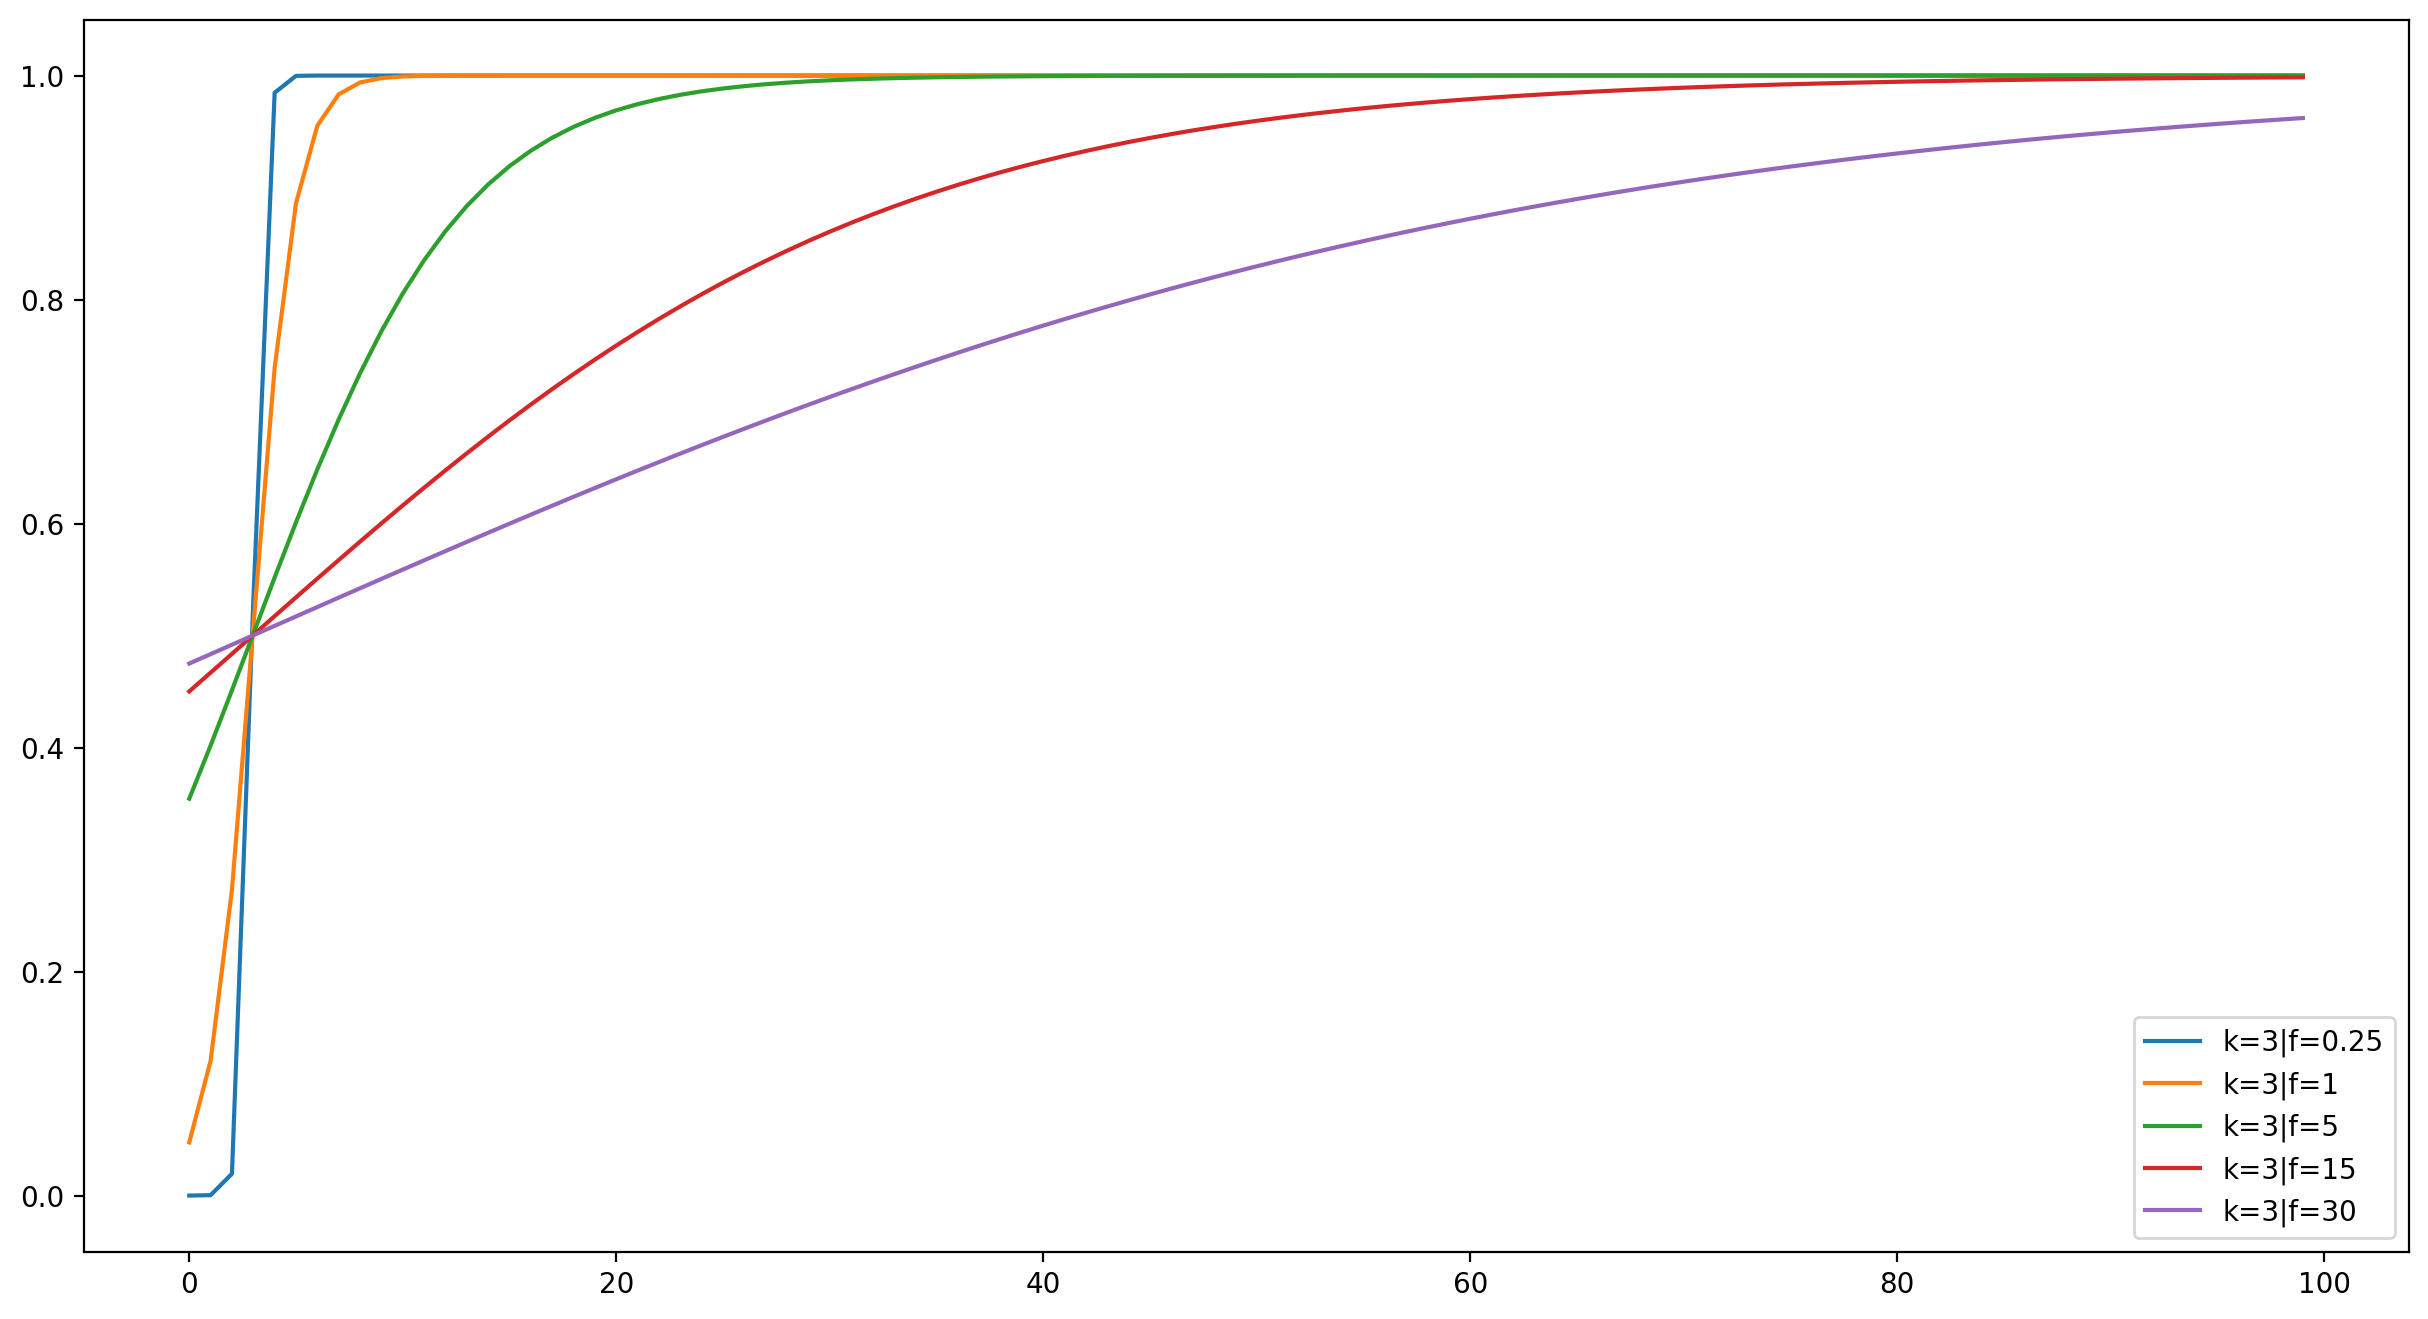

In [74]:
# включаем режим 'retina', если у вас экран Retina
%config InlineBackend.figure_format = 'retina'

# создаем массив значений
x = np.linspace(0, 100, 100)

# меняем значения f
plot = pd.DataFrame()
te = SmoothingTargetEncoder([], 3, 0.25)
plot["k=3|f=0.25"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 3, 1)
plot["k=3|f=1"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 3, 5)
plot["k=3|f=5"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 3, 15)
plot["k=3|f=15"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 3, 30)
plot["k=3|f=30"] = te.smoothing_func(x)
plot.plot(figsize=(15,8));

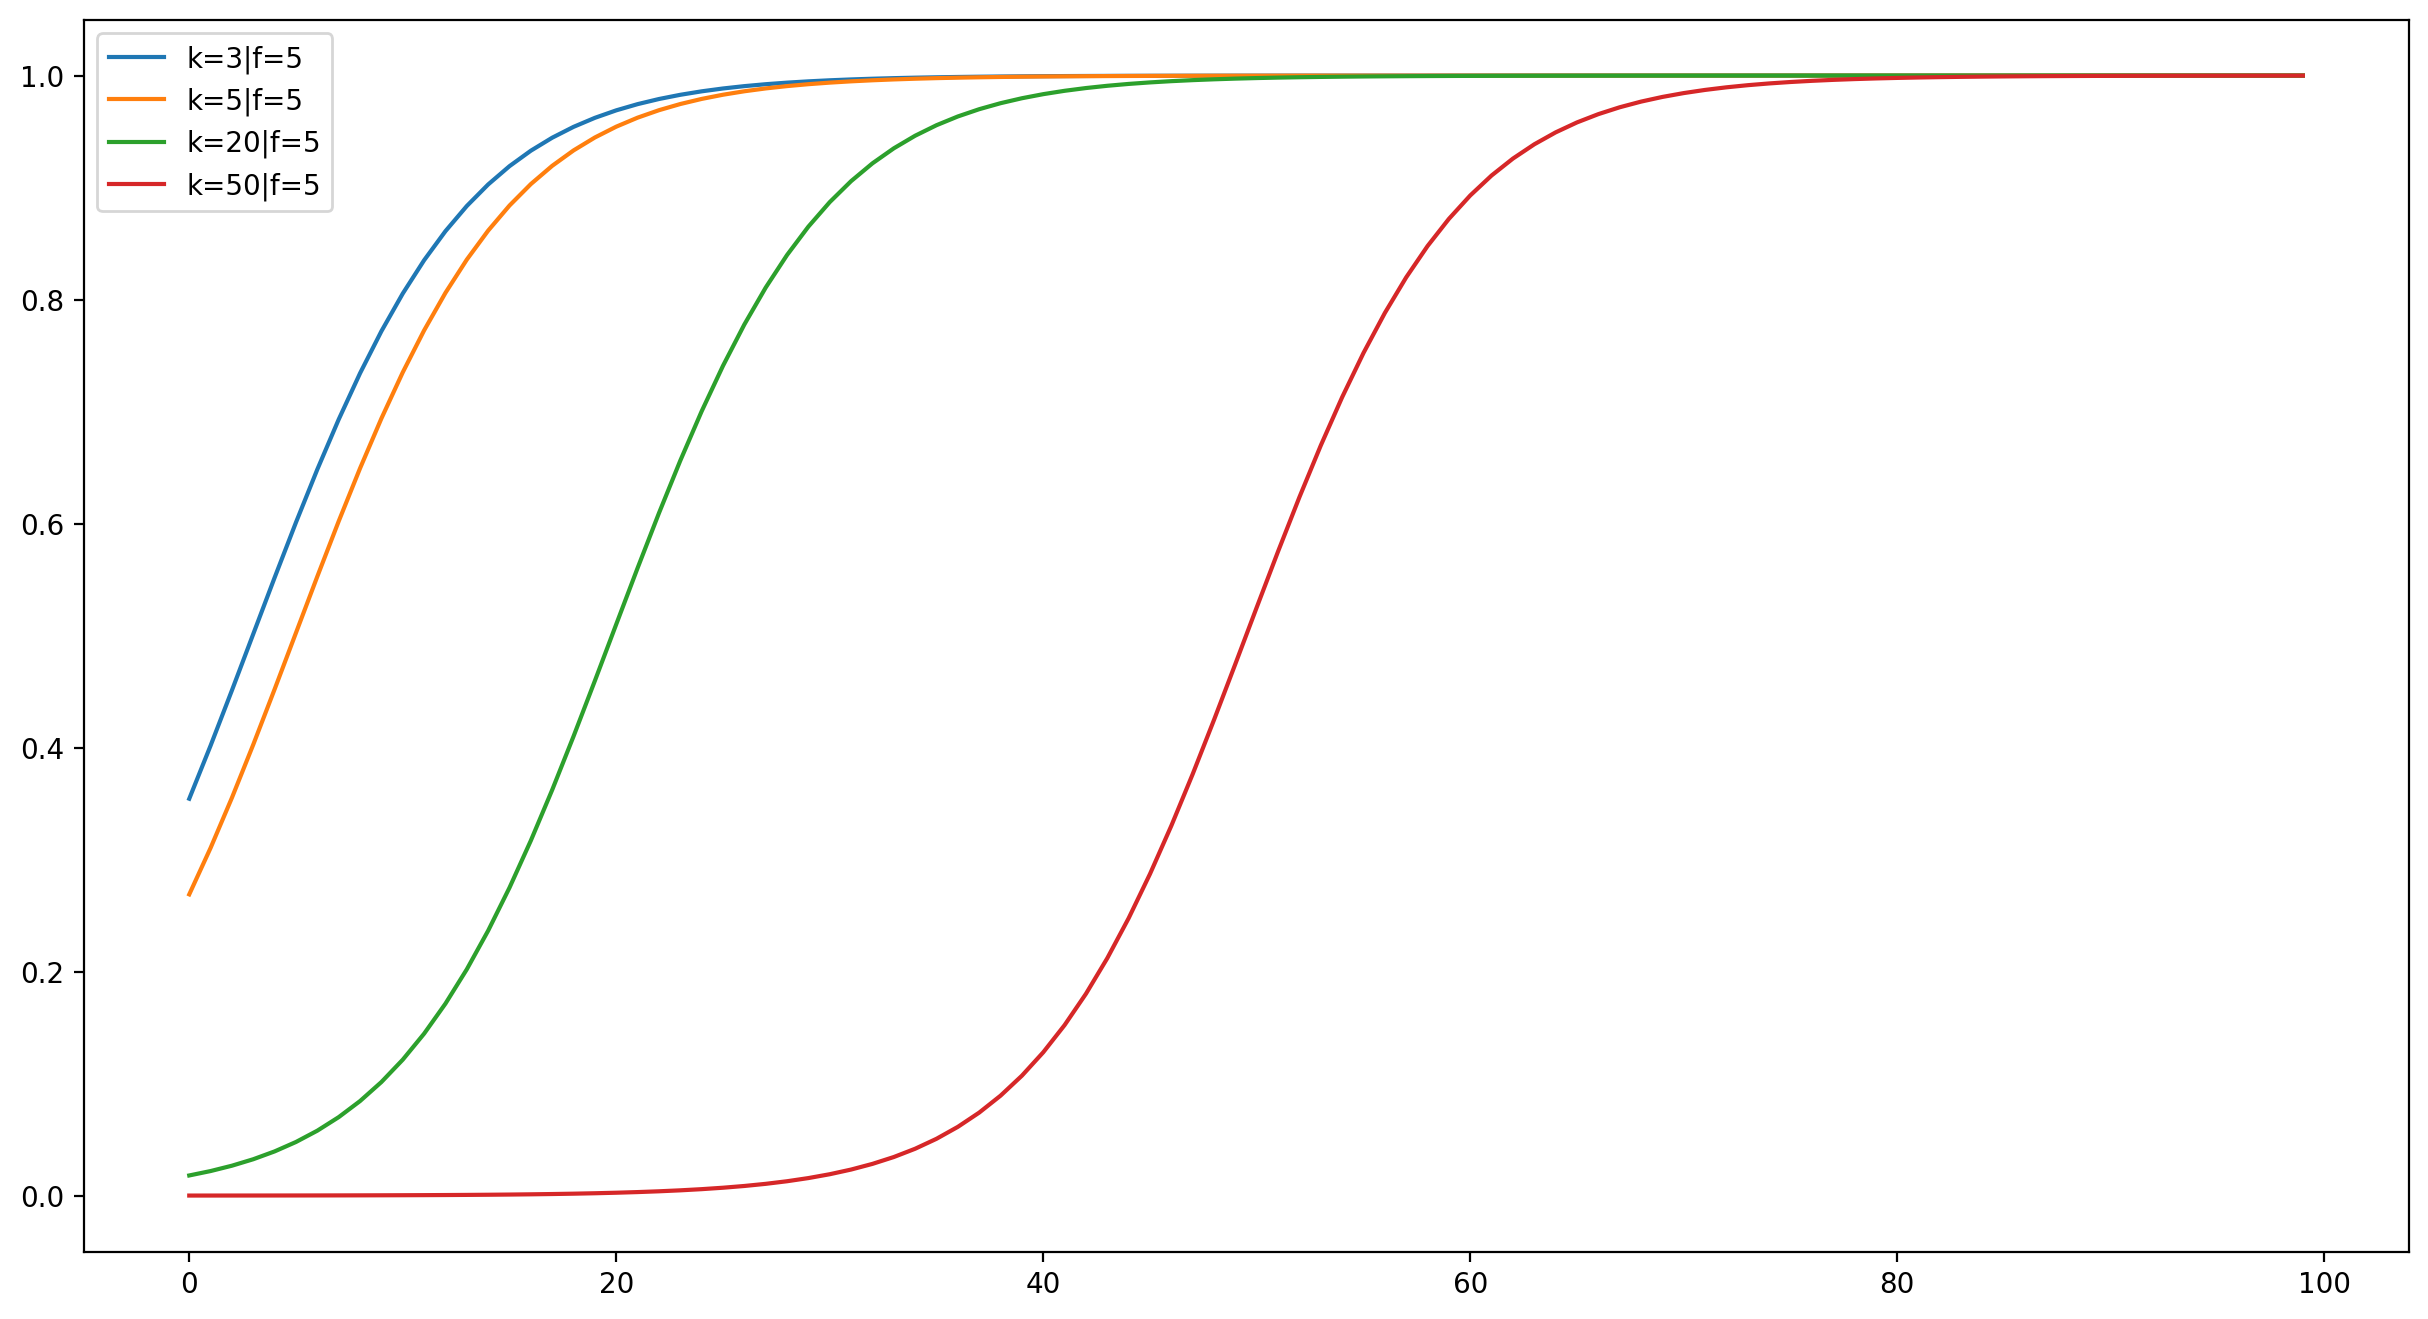

In [75]:
# меняем значения k
plot = pd.DataFrame()
te = SmoothingTargetEncoder([], 3, 5)
plot["k=3|f=5"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 5, 5)
plot["k=5|f=5"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 20, 5)
plot["k=20|f=5"] = te.smoothing_func(x)
te = SmoothingTargetEncoder([], 50, 5)
plot["k=50|f=5"] = te.smoothing_func(x)
plot.plot(figsize=(15,8));

In [76]:
# задаем список признаков
lst = ['living_region', 'job_position']
# создаем экземпляр класса SmoothingTargetEncoder
ste = SmoothingTargetEncoder(columns_names=lst, f=2, k=4)

In [77]:
# обучаем и применяем модель к обучающей выборке, т.е. 
# для каждого предиктора создаем таблицу, в соответствии 
# с которой категориям предиктора в обучающей выборке будут 
# сопоставлены сглаженные средние значения
# зависимой переменной в этих категориях, и сопоставляем
enc_train = ste.fit_transform(train, train['open_account_flg'])
enc_train

,living_region,job_position
0,0.425169,0.358333
1,0.425169,0.491035
2,0.674153,0.358333
3,0.425169,0.549661
4,0.674153,0.549661
5,0.674153,0.549661
6,0.674153,0.549661
7,0.674153,0.549661
8,0.425169,0.491035
9,0.425169,0.491035


In [78]:
# применяем модель к тестовой выборке,
# категории предиктора в тестовой выборке заменяются на обычные 
# средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
enc_test = ste.transform(test, smoothing=False)
enc_test

,living_region,job_position
0,0.8,0.25
1,0.4,0.50
2,0.8,0.25
3,0.4,0.60
4,0.8,0.25
5,0.8,0.60
6,0.8,0.60
7,0.4,0.50
8,0.4,0.50
9,0.2,0.50


In [79]:
# применяем модель к тестовой выборке,
# категории предиктора в тестовой выборке заменяются 
# на сглаженные средние значения зависимой переменной
# в этих категориях, вычисленные на обучающей выборке
enc_test = ste.transform(test, smoothing=True)
enc_test

,living_region,job_position
0,0.674153,0.358333
1,0.425169,0.491035
2,0.674153,0.358333
3,0.425169,0.549661
4,0.674153,0.358333
5,0.674153,0.549661
6,0.674153,0.549661
7,0.425169,0.491035
8,0.425169,0.491035
9,0.300678,0.491035


In [80]:
# создаем исторический набор
full_data = pd.concat([train, test], axis=0, ignore_index=True)
full_data

,living_region,job_position,open_account_flg
0,Московская область,Служащий,0
1,Московская область,Заместитель руководителя,1
2,Пермский край,Служащий,1
3,Московская область,Руководитель,0
4,Пермский край,Руководитель,1
5,Пермский край,Руководитель,1
6,Пермский край,Руководитель,1
7,Пермский край,Руководитель,0
8,Московская область,Заместитель руководителя,1
9,Московская область,Заместитель руководителя,0


In [81]:
# создаем экземпляр класса SmoothingTargetEncoder
full_ste = SmoothingTargetEncoder(columns_names=lst, f=2, k=4)
# обучаем и применяем модель к историческому набору, т.е. 
# для каждого признака создаем таблицу, в соответствии 
# с которой категориям признака в историческом наборе
# будут сопоставлены сглаженные средние значения
# зависимой переменной в этих категориях, и сопоставляем
enc_full_data = full_ste.fit_transform(
    full_data, full_data['open_account_flg'])
enc_full_data

,living_region,job_position
0,0.403864,0.497793
1,0.403864,0.455335
2,0.689637,0.497793
3,0.403864,0.497793
4,0.689637,0.497793
5,0.689637,0.497793
6,0.689637,0.497793
7,0.689637,0.497793
8,0.403864,0.455335
9,0.403864,0.455335


In [82]:
# создаем набор новых данных
new_data = pd.DataFrame(
    {'living_region': ['Московская область', 
                       'Краснодарский край', 
                       'Пермский край',
                       'Свердловская область'],
     'job_position': ['Заместитель руководителя', 
                      'Служащий', 
                      np.NaN,
                      'Руководитель']})
new_data

,living_region,job_position
0,Московская область,Заместитель руководителя
1,Краснодарский край,Служащий
2,Пермский край,NaN
3,Свердловская область,Руководитель


In [83]:
# вычисляем глобальное среднее в историческом наборе
full_data['open_account_flg'].mean()

0.48148148148148145

In [84]:
# вычислим средние значения зависимой переменной 
# в категориях признака living_region
# по исторической выборке
full_data.groupby('living_region')['open_account_flg'].mean()

living_region
Московская область      0.400000
Пермский край           0.700000
Свердловская область    0.285714
Name: open_account_flg, dtype: float64

In [85]:
# вычислим средние значения зависимой переменной 
# в категориях признака job_position
# по исторической выборке
full_data.groupby('job_position')['open_account_flg'].mean()

job_position
Заместитель руководителя    0.454545
Руководитель                0.500000
Служащий                    0.500000
Name: open_account_flg, dtype: float64

In [86]:
# применяем модель к набору новых данных,
# категории предиктора в наборе новых данных заменяются 
# на обычные средние значения зависимой переменной
# в этих категориях, вычисленные на историческом наборе
enc_new_data = full_ste.transform(new_data, smoothing=False)
enc_new_data

,living_region,job_position
0,0.400000,0.454545
1,0.481481,0.500000
2,0.700000,0.481481
3,0.285714,0.500000


In [87]:
# применяем модель к набору новых данных,
# категории предиктора в наборе новых данных заменяются 
# на сглаженные средние значения зависимой переменной
# в этих категориях, вычисленные на историческом наборе
enc_new_data = full_ste.transform(new_data, smoothing=True)
enc_new_data

,living_region,job_position
0,0.403864,0.455335
1,0.481481,0.497793
2,0.689637,0.481481
3,0.321427,0.497793


In [88]:
# импортируем класс TargetEncoder 
# из пакета category_encoders
from category_encoders import TargetEncoder

# создаем экземпляр класса TargetEncoder
# для обучающей выборки
target_enc = TargetEncoder(cols=lst, 
                           smoothing=2, 
                           min_samples_leaf=4)

# обучаем и применяем модель к обучающей выборке, 
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака
# в обучающей выборке будут сопоставлены сглаженные
#  средние значения зависимой переменной в этих
# категориях, и сопоставляем
target_encoded_train = target_enc.fit_transform(
    train, train['open_account_flg'])

# обучаем и применяем модель к тестовой выборке, 
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака
# в тестовой выборке будут сопоставлены сглаженные
#  средние значения зависимой переменной в этих
# категориях, вычисленные на обучающей выборке
target_encoded_test = target_enc.transform(
    test)

In [89]:
# взглянем на результаты кодировки 
# в обучающей выборке
target_encoded_train

,living_region,job_position,open_account_flg
0,0.425169,0.358333,0
1,0.425169,0.491035,1
2,0.674153,0.358333,1
3,0.425169,0.549661,0
4,0.674153,0.549661,1
5,0.674153,0.549661,1
6,0.674153,0.549661,1
7,0.674153,0.549661,0
8,0.425169,0.491035,1
9,0.425169,0.491035,0


In [90]:
# взглянем на результаты кодировки 
# в тестовой выборке
target_encoded_test

,living_region,job_position,open_account_flg
0,0.674153,0.358333,0
1,0.425169,0.491035,0
2,0.674153,0.358333,1
3,0.425169,0.549661,0
4,0.674153,0.358333,1
5,0.674153,0.549661,0
6,0.674153,0.549661,1
7,0.425169,0.491035,1
8,0.425169,0.491035,1
9,0.300678,0.491035,0


### Кодирование средним значением зависимой переменной, сглаженным через сигмоиду по схеме K-Fold

In [91]:
# импортируем библиотеку H2O
import h2o
# запускаем кластер H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 days 3 hours 52 mins
H2O_cluster_timezone:,Europe/Moscow
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_artemgruzdev_ojzdzy
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,8.000 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [92]:
# импортирум класс  H2OTargetEncoderEstimator
from h2o.estimators import H2OTargetEncoderEstimator

In [93]:
# создадим игрушечные обучающий и тестовый датафреймы
tr_h2o = pd.DataFrame(
    {'Class': ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',
               'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
               'C', 'C', 'C'],
     'Response': [1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 
                  1, 0, 0, 1, 1, 0, 0, 0, 0, 1]})

tst_h2o = pd.DataFrame(
    {'Class': ['A', 'B', 'A', 'C', 'D'],
     'Response': [1, 0, 1, 0, 0]})

# преобразовываем датафреймы pandas во фреймы h2o
tr_h2o = h2o.H2OFrame(tr_h2o)
tst_h2o = h2o.H2OFrame(tst_h2o)

# преобразовываем зависимую переменную в категориальную
tr_h2o['Response'] = tr_h2o['Response'].asfactor()
tst_h2o['Response'] = tst_h2o['Response'].asfactor()

# задаем название зависимой переменной
target = 'Response'

# задаем название столбца с номерами фолдов
fold_column = 'kfold_column'

# создаем столбец с номерами фолдов
# и преобразовываем во фрейм h2o
fold_col = h2o.H2OFrame(
    pd.DataFrame({'C1': [0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
                         0, 1, 1, 1, 1, 1, 2, 0, 1, 2]}))

# добавляем столбец с номерами фолдов 
# в обучающую выборку
tr_h2o[fold_column] = fold_col

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [94]:
# выполняем кодирование в обучающей выборке

# создаем экземпляр класса H2OTargetEncoderEstimator
te = H2OTargetEncoderEstimator(
    fold_column=fold_column,
    data_leakage_handling='k_fold',
    blending=True,
    inflection_point=20,
    smoothing=10,
    noise=0,
    seed=None)

# обучаем модель на обучающей выборке, 
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака
# в обучающей выборке будут сопоставлены сглаженные
# по схеме kfold средние значения зависимой
# переменной в этих категориях
te.train(x=['Class'],
         y=target,
         training_frame=tr_h2o)

# применяем модель к обучающей выборке,
# для каждого признака категориям сопоставляем 
# сглаженные по схеме kfold средние значения
#  зависимой переменной в этих категориях
tr_te = te.transform(frame=tr_h2o, as_training=True)
tr_te

targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


Class_te,Class,kfold_column,Response
0.568021,A,0,1
0.568021,A,0,1
0.568021,A,0,1
0.568021,A,0,1
0.568021,A,0,0
0.568021,A,0,1
0.615779,A,1,0
0.615779,A,1,1
0.596295,A,2,1
0.50714,B,0,0


In [95]:
# применяем модель к тестовой выборке,
# для каждого признака категориям сопоставляем сглаженные 
# средние значения зависимой переменной в этих категориях,
# вычисленные на обучающей выборке
tst_te = te.transform(frame=tst_h2o, as_training=False, noise=0)
tst_te

Class_te,Class,Response
0.652538,A,1
0.47977,B,0
0.652538,A,1
0.50714,C,0
0.55,D,0


In [96]:
# создаем экземпляр класса H2OTargetEncoderEstimator
te = H2OTargetEncoderEstimator(
    fold_column=fold_column,
    data_leakage_handling=None,
    blending=None,
    inflection_point=None,
    smoothing=None,
    noise=0,
    seed=None)

# обучаем модель на обучающей выборке, 
# т.е. для каждого признака создаем таблицу, 
# в соответствии с которой категориям признака
# в тестовой выборке будут сопоставлены обычные 
# средние значения зависимой переменной в этих
# категориях, вычисленные на обучающей выборке
te.train(x=['Class'],
         y=target,
         training_frame=tr_h2o)

# применяем модель к тестовой выборке,
# для каждого признака категориям сопоставляем обычные
# средние значения зависимой переменной в этих
# категориях, вычисленные на обучающей выборке
tst_te = te.transform(frame=tst_h2o, as_training=False, noise=0)
tst_te

targetencoder Model Build progress: |████████████████████████████████████████████| (done) 100%


Class_te,Class,Response
0.777778,A,1
0.375,B,0
0.777778,A,1
0.333333,C,0
0.55,D,0


### Кодирование средним значением зависимой переменной, сглаженным через параметр регуляризации

In [97]:
# пишем функцию, которая выполняет кодирование средним значением 
# зависимой переменной, сглаженным через параметр регуляризации
def simple_smooth_mean(df, feature, target, alpha):
    # вычисляем глобальное среднее
    mean = df[target].mean()

    # вычисляем частоты и средние по каждой категории
    agg = df.groupby(feature)[target].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # вычисляем сглаженные средние
    smooth = (counts * means + alpha * mean) / (counts + alpha)

    # заменяем каждое значение соответствующим
    # сглаженным средним
    return df[feature].map(smooth)

In [98]:
# выполняем кодирование и смотрим результаты
tr['Class_smpl_smoth_mean_enc'] = simple_smooth_mean(
    tr, 
    feature='Class', 
    target='Response', 
    alpha=2)
tr

,Class,Response,Class_labelenc,Class_custlabelenc,Agecat,Class_custlabelenc2,Сlass_abs_freq,Class_rel_freq,Class_smpl_smoth_mean_enc
0,A,1,0,1,old,1,4,0.444444,0.759259
1,A,0,0,1,old,1,4,0.444444,0.759259
2,A,1,0,1,yng,2,4,0.444444,0.759259
3,A,1,0,1,yng,2,4,0.444444,0.759259
4,B,1,1,2,old,3,3,0.333333,0.711111
5,B,1,1,2,old,3,3,0.333333,0.711111
6,B,0,1,2,yng,0,3,0.333333,0.711111
7,C,1,2,3,old,4,2,0.222222,0.888889
8,C,1,2,3,old,4,2,0.222222,0.888889


### Кодирование средним значением зависимой переменной, вычисленным по "прошлому" (упрощенный вариант кодировки, применяющейся в библиотеке CatBoost)

In [99]:
# пишем функцию, которая выполняет кодирование средними значениями 
# зависимой переменной, вычисленными по "прошлому"
def history_mean_encoding(df, feature, target, random_state):
    # записываем индекс
    df['index'] = df.index
    # задаем стартовое значение генератора 
    # псевдослучайных чисел
    np.random.seed(random_state)
    # перемешиваем
    df = df.sample(n=len(df), replace=False)
    # вычисляем суммарное значение зависимой переменной 
    # нарастающим итогом, интересующее наблюдение 
    # в расчетах не участвует
    cumsum = df.groupby(feature)[target].cumsum() - df[target]
    # вычисляем количество наблюдений нарастающим итогом,
    # интересующее наблюдение в расчетах не участвует
    cumcnt = df.groupby(feature).cumcount()
    # вычисляем глобальное среднее
    global_mean = df[target].mean()
    # получаем закодированные значения
    df[feature+'_history_mean_encoded'] = (cumsum / cumcnt).fillna(
        global_mean)
    # восстанавливаем исходный порядок наблюдений 
    # по ранее сохраненному индексу
    df = df.sort_values('index')
    # удаляем индекс
    df.drop('index', axis=1, inplace=True)
    return df

# выполняем кодирование средними значениями зависимой
# переменной, вычисленными по "прошлому"
history_mean_encoding(tr, 'Class', 'Response', random_state=4)

,Class,Response,Class_labelenc,Class_custlabelenc,Agecat,Class_custlabelenc2,Сlass_abs_freq,Class_rel_freq,Class_smpl_smoth_mean_enc,Class_history_mean_encoded
0,A,1,0,1,old,1,4,0.444444,0.759259,1.000000
1,A,0,0,1,old,1,4,0.444444,0.759259,1.000000
2,A,1,0,1,yng,2,4,0.444444,0.759259,1.000000
3,A,1,0,1,yng,2,4,0.444444,0.759259,0.777778
4,B,1,1,2,old,3,3,0.333333,0.711111,0.777778
5,B,1,1,2,old,3,3,0.333333,0.711111,0.500000
6,B,0,1,2,yng,0,3,0.333333,0.711111,1.000000
7,C,1,2,3,old,4,2,0.222222,0.888889,1.000000
8,C,1,2,3,old,4,2,0.222222,0.888889,0.777778


In [100]:
# пишем класс TargetEncodingExpandingMean, выполняющий 
# кодирование средним значением зависимой переменной 
# по "прошлому"
class TargetEncodingExpandingMean():
    """
    Автор: Dmitry Larko
    https://www.kaggle.com/dmitrylarko
    
    Параметры
    ---------
    columns_names: list
        Cписок признаков.
    """

    def __init__(self, columns_names, random_state):
        
        # инициализируем публичные атрибуты
        
        # список признаков, которые будем кодировать
        self.columns_names = columns_names
        
        # создаем пустой словарь, куда будем сохранять обычные 
        # средние значения зависимой переменной в каждой
        # категории признака:
        # ключами в словаре будут названия признаков, а значениями 
        # - таблицы, в которых напротив каждой категории признака 
        # будет указано среднее значение зависимой переменной 
        # в данной категории признака
        self.learned_values = {}
        
        # создадим переменную, в которой будем хранить глобальное 
        # среднее (среднее значение зависимой переменной 
        # по обучающему набору)
        self.dataset_mean = np.nan
        
        self.random_state = random_state
        
    # fit должен принимать в качестве аргументов только X и y
    def fit(self, X, y=None):
        
        # выполняем копирование массива во избежание предупреждения 
        # SettingWithCopyWarning "A value is trying to be set on 
        # a copy of a slice from a DataFrame (Происходит попытка 
        # изменить значение в копии среза данных датафрейма)"
        X_ = X.copy()
        
        # добавляем в новый массив признаков зависимую переменную 
        # и называем ее __target__, именно эту переменную __target__ 
        # будем использовать в дальнейшем для вычисления среднего 
        # значения зависимой переменной для каждой категории признака
        X_['__target__'] = y 
        
        # создадим переменную, в которой будем хранить глобальное среднее 
        # (среднее значение зависимой переменной по обучающему набору)
        self.dataset_mean = np.mean(y)
        
        # в цикле для каждого признака, который участвует в кодировании 
        # (присутствует в списке self.columns_names)
        for c in [x for x in X_.columns if x in self.columns_names]:
            # формируем набор, состоящий из значений данного признака 
            # и значений зависимой переменной, группируем данные по 
            # категориям признака, считаем среднее значение зависимой 
            # переменной для каждой категории признака
            stats = (X_[[c, '__target__']]
                     .groupby(c)['__target__']
                     .agg(['mean', 'size']))
            
            # вычисляем обычное среднее значение зависимой переменной 
            # для категории признака
            stats['__target__'] = stats['mean']
            
            # формируем набор, состоящий из признака и обычных средних 
            # значений зависимой переменной для категорий признака
            stats = (stats.drop([x for x in stats.columns 
                                 if x not in ['__target__', c]], axis=1)
                    .reset_index())
            
            # сохраним обычные средние значения зависимой переменной 
            # для каждой категории признака в словарь
            self.learned_values[c] = stats

        return self
    
    # transform выполняет преобразование для новых данных,
    # transform принимает в качестве аргумента только X
    def transform(self, X):
        
        # скопируем массив данных с признаками, значения которых 
        # будем кодировать, этот массив будем изменять при вызове
        # метода .transform(), поэтому важно его скопировать, 
        # чтобы не изменить исходный массив признаков
        transformed_X = X[self.columns_names].copy()
        
        # в цикле для каждого признака, который участвует в кодировании
        for c in transformed_X.columns:
            # формируем датафрейм, состоящий из значений данного признака, 
            # и выполняем слияние с датафреймом, содержащим обычные средние 
            # значения зависимой переменной для каждой категории признака,
            # нам нужны только обычные средние значения зависимой переменной 
            # для каждой категории признака, поэтому в датафрейме оставляем 
            # только столбец '__target__'
            transformed_X[c] = (transformed_X[[c]].merge(
                self.learned_values[c], on=c, how='left'))['__target__']
        
        # пропуски или новые категории признаков заменяем средним 
        # значением зависимой переменной по обучающему набору 
        transformed_X = transformed_X.fillna(self.dataset_mean)
        
        # возвращаем закодированный массив признаков
        return transformed_X
    
    # метод fit_transform выполняет преобразование для обучающих данных,
    # fit_transform принимает в качестве аргументов только X, y
    def fit_transform(self, X, y):
        
        # применяем метод fit, чтобы вычислить средние значения 
        # зависимой переменной для категорий признаков
        self.fit(X, y)
        
        # скопируем массив данных с признаками, значения которых 
        # будем кодировать, этот массив будем изменять при вызове 
        # метода .transform(), поэтому важно его скопировать, 
        # чтобы не изменить исходный массив признаков
        X_ = X[self.columns_names].copy().reset_index(drop=True)
        
        # добавляем в новый массив признаков зависимую переменную 
        # и называем ее __target__, именно эту переменную __target__ 
        # будем использовать в дальнейшем для вычисления среднего 
        # значения зависимой переменной для каждой категории признака
        X_['__target__'] = y
        
        # добавляем индекс наблюдения, чтобы после перемешивания 
        # восстановить исходный порядок наблюдений
        X_['index'] = X_.index
        
        # создаем пустой датафрейм, в который будем сохранять 
        # закодированные значения предикторов
        X_transformed = pd.DataFrame()
        
        # задаем стартовое значение генератора псевдослучайных чисел
        np.random.seed(self.random_state)
        
        # в цикле для каждого предиктора, который участвует в кодировании 
        # (присутствует в списке self.columns_names)
        for c in self.columns_names:
            # формируем набор, состоящий из значений данного признака, 
            # значений зависимой переменной и столбца index
            X_shuffled = X_[[c, '__target__', 'index']].copy()
            
            # перемешиваем наблюдения
            X_shuffled = X_shuffled.sample(n=len(X_shuffled), replace=False)
            
            # добавим счетчик количества наблюдений cnt, чтобы 
            # посчитать размер категории нарастающим итогом
            X_shuffled['cnt'] = 1
            
            # вычисляем суммарное значение зависимой переменной 
            # нарастающим итогом, интересующее наблюдение 
            # в расчетах не участвует
            X_shuffled['cumsum'] = (X_shuffled
                                   .groupby(c, sort=False)['__target__']
                                   .apply(lambda x: x.shift().cumsum()))
            
            # вычисляем количество наблюдений нарастающим итогом,
            # интересующее наблюдение в расчетах не участвует
            X_shuffled['cumcnt'] = (X_shuffled
                                   .groupby(c, sort=False)['cnt']
                                   .apply(lambda x: x.shift().cumsum()))
            
            # получаем средние значения зависимой переменной 
            # для каждого признака на предшествующих данных
            X_shuffled['encoded'] = (X_shuffled['cumsum'] / 
                                     X_shuffled['cumcnt'])
            
            # пропуски или новые категории признаков заменяем средним 
            # значением зависимой переменной по обучающему набору
            X_shuffled['encoded'] = X_shuffled['encoded'].fillna(
                self.dataset_mean)
            
            # отсортируем полученный датафрейм с закодированными 
            # значениями по столбцу index, чтобы восстановить
            # порядок наблюдений
            X_transformed[c] = X_shuffled.sort_values(
                'index')['encoded'].values
        
        return X_transformed

In [101]:
# создаем экземпляр класса TargetEncodingExpandingMean
teem = TargetEncodingExpandingMean(
    columns_names=['Class'], random_state=4)
# выполняем кодирование для обучающего датафрейма
enc_tr = teem.fit_transform(tr, tr['Response'])
enc_tr

,Class
0,1.000000
1,1.000000
2,1.000000
3,0.777778
4,0.777778
5,0.500000
6,1.000000
7,1.000000
8,0.777778


In [102]:
# создаем тестовые данные
tst = pd.DataFrame({'Class': ['A', 'A', 'A', 'A', 'D', 
                              'D', 'B', 'B', 'C', 'C']})

In [103]:
# выполняем кодирование для тестового датафрейма
enc_tst = teem.transform(tst)
enc_tst

,Class
0,0.750000
1,0.750000
2,0.750000
3,0.750000
4,0.777778
5,0.777778
6,0.666667
7,0.666667
8,1.000000
9,1.000000


In [104]:
# импортируем класс CatBoostEncoder 
# из пакета category_encoders
from category_encoders import CatBoostEncoder

# создаем экземпляр класса CatBoostEncoder
# для обучающей выборки
catboost_enc = CatBoostEncoder()

# обучаем и применяем модель к обучающей выборке
ctbst_enc_tr = catboost_enc.fit_transform(
    tr['Class'], tr['Response'])

# взглянем на результаты кодировки в обучающей выборке
ctbst_enc_tr

,Class
0,0.777778
1,0.888889
2,0.592593
3,0.694444
4,0.777778
5,0.888889
6,0.925926
7,0.777778
8,0.888889


In [105]:
# вычисляем глобальное среднее
global_mean = tr['Response'].mean()
# аддитивная константа, позволяющая избежать нуля
# в числителе и знаменателе
a = 1

In [106]:
# получаем таблицу с суммарным значением зависимой 
# переменной и общим количеством наблюдений 
# для каждой категории
tbl1 = tr['Response'].groupby(
    tr['Class']).agg(['sum', 'count'])
tbl1

,sum,count
Class,,
A,3,4
B,2,3
C,2,2


In [107]:
# получаем таблицу с накопленными суммарными значениями 
# зависимой переменной и накопленными суммами 
# наблюдений для каждой категории
tbl2 = tr['Response'].groupby(
    tr['Class']).agg(['cumsum', 'cumcount'])
tbl2

,cumsum,cumcount
0,1,0
1,1,1
2,2,2
3,3,3
4,1,0
5,2,1
6,2,2
7,1,0
8,2,1


In [108]:
# получаем закодированные значения для обучающей выборки
tr_enc_values = ((tbl2['cumsum'] - tr['Response'] + global_mean * a) / 
                 (tbl2['cumcount'] + a))
tr_enc_values

0    0.777778
1    0.888889
2    0.592593
3    0.694444
4    0.777778
5    0.888889
6    0.925926
7    0.777778
8    0.888889
dtype: float64

In [109]:
# применяем модель к тестовой выборке
ctbst_enc_tst = catboost_enc.transform(
    tst['Class'])
# взглянем на результаты кодировки в тестовой выборке
ctbst_enc_tst

,Class
0,0.755556
1,0.755556
2,0.755556
3,0.755556
4,0.777778
5,0.777778
6,0.694444
7,0.694444
8,0.925926
9,0.925926


In [110]:
# получаем закодированные значения для тестовой выборки

# вычисляем расширяющиеся средние по категориям
level_means = ((tbl1['sum'] + global_mean * a) / 
               (tbl1['count'] + a))
print(level_means)
tst_enc_values = tst['Class'].map(level_means)
# пропуски из-за новых категорий кодируем глобальным средним
tst_enc_values.fillna(global_mean, inplace=True)
# сопоставляем наблюдениям расширяющиеся 
# средние по категориям
tst_enc_values

Class
A    0.755556
B    0.694444
C    0.925926
dtype: float64


0    0.755556
1    0.755556
2    0.755556
3    0.755556
4    0.777778
5    0.777778
6    0.694444
7    0.694444
8    0.925926
9    0.925926
Name: Class, dtype: float64

## Присвоение категориям в зависимости от порядка их появления целочисленных значений, начиная с 1 ( Ordinal Encoding)

In [111]:
# импортируем класс OrdinalEncoder из пакета category_encoders
from category_encoders import OrdinalEncoder

# создаем экземпляр класса OrdinalEncoder
ord_enc = OrdinalEncoder(cols=['living_region', 'job_position'])

# выполняем кодирование переменных living_region 
# и job_position в обучающей выборке
ord_enc_train = ord_enc.fit_transform(train)
ord_enc_train

,living_region,job_position,open_account_flg
0,1,1,0
1,1,2,1
2,2,1,1
3,1,3,0
4,2,3,1
5,2,3,1
6,2,3,1
7,2,3,0
8,1,2,1
9,1,2,0


## Бинарное кодирование (Binary Encoding)

In [112]:
# создаем игрушечный датафрейм1
toy_df = pd.DataFrame({'Class': ['A', 'B', 'C', 'D', 'E', 'F']})
# выполняем Ordinal Encoding
ord_enc_toy_df = OrdinalEncoder().fit_transform(toy_df)
ord_enc_toy_df

,Class
0,1
1,2
2,3
3,4
4,5
5,6


In [113]:
# импортируем класс BinaryEncoder из пакета category_encoders
from category_encoders import BinaryEncoder
# выполняем Binary Encoding
bi_enc_toy_df = BinaryEncoder().fit_transform(toy_df)
# взглянем на результаты кодировки
bi_enc_toy_df

,Class_0,Class_1,Class_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,1,1,0


## Бинарное кодирование с хэшированием (Hashing)

In [114]:
# импортируем класс HashingEncoder из пакета category_encoders
from category_encoders import HashingEncoder
# выполняем Hashing Encoding
hash_enc_toy_df = HashingEncoder().fit_transform(toy_df)
hash_enc_toy_df

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0


## Создание переменных-взаимодействий (interactions)

In [115]:
# пишем функцию, которая создает взаимодействие 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_interact(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = (df[feature1].astype(str) + ' + ' 
                                       + df[feature2].astype(str))
make_interact(train, 'living_region', 'job_position')

# еще можно еще так
train['liv_reg + job_pos'] = train.apply(
    lambda x: f"{x['living_region']} + {x['job_position']}", 
    axis=1)

train.head()

,living_region,job_position,open_account_flg,living_region + job_position,liv_reg + job_pos
0,Московская область,Служащий,0,Московская область + Служащий,Московская область + Служащий
1,Московская область,Заместитель руководителя,1,Московская область + Заместитель руководителя,Московская область + Заместитель руководителя
2,Пермский край,Служащий,1,Пермский край + Служащий,Пермский край + Служащий
3,Московская область,Руководитель,0,Московская область + Руководитель,Московская область + Руководитель
4,Пермский край,Руководитель,1,Пермский край + Руководитель,Пермский край + Руководитель


## Биннинг

In [116]:
# загружаем и смотрим данные
dev = pd.read_csv('Data/Stat_FE3.csv', sep=';')
dev.head()

,tariff_id,credit_sum,monthly_income,open_account_flg
0,1_4,33579.0,36000.0,0
1,1_32,23511.0,45000.0,0
2,1_5,39990.0,50000.0,0
3,1_3,3490.0,35000.0,0
4,1_6,36358.0,50000.0,0


### Биннинг на основе интервалов, созданных вручную или одинаковой ширины

In [117]:
# задаем точки, в которых будут находится границы интервалов 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
dev['incomecat'] = pd.cut(dev['monthly_income'], bins, 
                          labels=group_names)
# посмотрим частоты категорий нового признака
dev['incomecat'].value_counts()

Low        96522
Average    22803
High         197
Name: incomecat, dtype: int64

In [118]:
# а теперь выполним биннинг на основе 
# интервалов одинаковой ширины
dev['incomecat2'] = pd.cut(dev['monthly_income'], 10)
# посмотрим частоты категорий нового признака
dev['incomecat2'].value_counts()

(4105.0, 94500.0]       115748
(94500.0, 184000.0]       3438
(184000.0, 273500.0]       224
(273500.0, 363000.0]        77
(363000.0, 452500.0]        17
(452500.0, 542000.0]         7
(542000.0, 631500.0]         4
(721000.0, 810500.0]         4
(631500.0, 721000.0]         2
(810500.0, 900000.0]         1
Name: incomecat2, dtype: int64

### Биннинг на основе квантилей

In [119]:
# осуществляем биннинг переменной monthly_income 
# на основе квартилей и записываем результаты 
# в новую переменную income_quartile
dev['income_quartile'] = pd.qcut(dev['monthly_income'], 4)
# посмотрим частоты категорий нового признака
dev['income_quartile'].value_counts(normalize=True)

(4999.999, 25000.0]    0.289880
(35000.0, 50000.0]     0.260714
(25000.0, 35000.0]     0.256974
(50000.0, 900000.0]    0.192433
Name: income_quartile, dtype: float64

### Биннинг на основе зависимой переменной

In [120]:
# взглянем на минимальное и максимальное значения
print(dev['credit_sum'].min())
print(dev['credit_sum'].max())

2736.0
200000.0


In [121]:
# задаем точки, в которых будут находится границы
# категорий будущего признака credsumcat
bins = [-np.inf, 10000, 30000, 50000, np.inf]
# осуществляем биннинг признака credit_sum и записываем
# результаты в новый признак credsumcat
dev['credsumcat'] = pd.cut(dev['credit_sum'], bins)

In [122]:
# строим таблицу сопряженности credsumcat * open_account_flg
biv = pd.crosstab(dev['credsumcat'], dev['open_account_flg'])
biv

open_account_flg,0,1
credsumcat,,
"(-inf, 10000.0]",7378,2825
"(10000.0, 30000.0]",62408,13428
"(30000.0, 50000.0]",17921,3299
"(50000.0, inf]",10796,1467


In [123]:
# пишем функцию, которая вычисляет WoE для 
# каждой категории выбранного признака, 
# добавляем a=0.0001, чтобы избежать деления на 0
def WoE(df, feature, target):
    biv = pd.crosstab(df[feature], df[target])
    a = 0.0001
    WoE = (np.log((biv[1] / sum(biv[1]) + a) / 
                  (biv[0] / sum(biv[0]) + a)))
    return WoE

In [124]:
# вычисляем WoE для каждой категории признака credsumcat
WoE(dev, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 10000.0]       0.584076
(10000.0, 30000.0]    0.008308
(30000.0, 50000.0]   -0.147606
(50000.0, inf]       -0.450776
dtype: float64

In [125]:
# вычислим значение зависимой переменной в выборке
dev['open_account_flg'].mean()

0.175858837703519

In [126]:
# вычислим средние значения зависимой переменной 
# в категориях переменной credsumcat
dev.groupby('credsumcat')['open_account_flg'].apply(lambda x: x.mean())

credsumcat
(-inf, 10000.0]       0.276879
(10000.0, 30000.0]    0.177066
(30000.0, 50000.0]    0.155467
(50000.0, inf]        0.119628
Name: open_account_flg, dtype: float64

In [127]:
# выполняем WoE-трансформацию переменной credsumcat
woe_values = WoE(dev, 'credsumcat', 'open_account_flg')
dev['experiment'] = dev['credsumcat'].map(woe_values)

In [128]:
# строим логистическую регрессию c 
# WoE-трансформированной переменной
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear').fit(
    dev[['experiment']], dev['open_account_flg'])

# удаляем WoE-трансформированную переменную
dev.drop('experiment', axis=1, inplace=True)

In [129]:
# печатаем значение константы и коэффициента
intercept = np.round(np.asscalar(logreg.intercept_), 3)
coef = np.round(np.asscalar(logreg.coef_), 3)
print('константа:', intercept)
print('коэффициент:', coef)

константа: -1.545
коэффициент: 1.0


In [130]:
# вычислим процент не-событий и событий
percents = (dev['open_account_flg'].value_counts() / 
            len(dev['open_account_flg']))
percents

0    0.824141
1    0.175859
Name: open_account_flg, dtype: float64

In [131]:
# убедимся, что константа - натуральный логарифм
# отношения процента событий к не-событиям
import math
number = percents[1] / percents[0]
base = 2.72
math.log(number, base)

-1.5436847899687964

In [132]:
# пишем функцию, которая вычисляет IV для каждой категории 
# выбранного признака, добавляем a = 0.0001, чтобы 
# избежать деления на 0
def IV_cat(df, feature, target):
    biv = pd.crosstab(df[feature], df[target])
    a = 0.0001
    IV_cat = ((biv[1] / sum(biv[1]) + a) - 
              (biv[0] / sum(biv[0]) + a)) * np.log(
        (biv[1] / sum(biv[1]) + a) / (biv[0] / sum(biv[0]) + a))
    return IV_cat

In [133]:
# вычисляем IV для каждой категории признака credsumcat
IV_cat(dev, 'credsumcat', 'open_account_flg')

credsumcat
(-inf, 10000.0]       0.034753
(10000.0, 30000.0]    0.000044
(30000.0, 50000.0]    0.003687
(50000.0, inf]        0.017944
dtype: float64

In [134]:
# пишем функцию, которая вычисляет итоговое значение IV
# для выбранного признака, добавляем a = 0.0001, 
# чтобы избежать деления на 0
def IV(df, feature, target):
    biv = pd.crosstab(df[feature], df[target])
    a = 0.0001
    IV = sum(((biv[1] / sum(biv[1]) + a) - 
              (biv[0] / sum(biv[0]) + a)) * np.log(
        (biv[1] / sum(biv[1]) + a) / (biv[0] / sum(biv[0]) + a)))
    return IV

In [135]:
# вычисляем итоговое IV для переменной credsumcat
IV(dev, 'credsumcat', 'open_account_flg')

0.05642812895354753

In [136]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df): 
    # создаем список, в который будем записывать IV
    iv_list = []
    # создаем копию датафрейма
    df = df.copy()
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a = 0.0001 
    # задаем зависимую переменную
    target = df['open_account_flg']
    # отбираем столбцы, у которых больше 10 уникальных значений
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df.select_dtypes(include=['number']).columns
    # запускаем цикл, который вычисляет IV 
    # по каждой выбранной переменной
    for var_name in numerical_columns:
        # разбиваем переменную на 10 квантилей
        df[var_name] = pd.qcut(df[var_name].values, 10, 
                               duplicates='drop').codes
        # строим таблицу сопряженности между категоризированным 
        # признаков и зависимой переменной
        biv = pd.crosstab(df[var_name], target)        
        # вычисляем IV на основе таблицы сопряженности
        IV = sum(((biv[1] / sum(biv[1]) + a) - 
                  (biv[0] / sum(biv[0]) + a)) * np.log(
            (biv[1] / sum(biv[1]) + a) / (biv[0] / sum(biv[0]) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV)
    # создаем датафрейм с двумя столбцами, в одном - названия 
    # признаков, в другом - IV этих переменных
    result = pd.DataFrame({'Название переменной': numerical_columns, 
                           'IV': iv_list})
    # добавляем дополнительный столбец "Полезность"
    # градация по Наиму Сиддики
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                            if x <= 0.5 and x > 0.3 else 'Средняя'
                            if x <= 0.3 and x > 0.1 else 'Слабая' 
                            if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                            for x in result['IV']]
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [137]:
# вычисляем итоговые IV по признакам
numeric_IV(dev)

,Название переменной,IV,Полезность
0,credit_sum,0.065526,Слабая
1,monthly_income,0.005984,Бесполезная


In [138]:
# импортируем необходимые классы
from woe import *

In [139]:
# создаем модель - экземпляр класса WoE, задаем максимально возможное 
# количество бинов, минимальное количество наблюдений в
# бине, тип предиктора, тип зависимой переменной
woe = WoE(qnt_num=10, min_block_size=10, v_type='c', t_type='b')

In [140]:
# обучаем модель - вычисляем WoE
woe.fit(dev['credit_sum'], dev['open_account_flg']);

In [141]:
# выполняем WoE-трансформацию переменной credit_sum
woe.transform(dev['credit_sum'])
# уменьшаем количество знаков после десятичной точки
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# выводим информацию о бинах
print(woe.bins)

    mean   bad    obs  good    woe      bins labels
0  0.274  2976  10871  7895 -0.569      -inf      0
1  0.168  1826  10879  9053  0.056 10290.000      1
2  0.151  1639  10849  9210  0.182 13109.000      2
3  0.177  1928  10866  8938 -0.011 15348.000      3
4  0.200  2168  10866  8698 -0.155 17284.000      4
5  0.196  2125  10864  8739 -0.131 19827.000      5
6  0.182  1974  10871  8897 -0.039 22877.100      6
7  0.162  1759  10878  9119  0.101 26369.000      7
8  0.181  1965  10846  8881 -0.036 30468.000      8
9  0.127  1380  10866  9486  0.383 40197.636      9
10 0.118  1279  10866  9587  0.470 52499.636     10


In [142]:
# улучшаем монотонность
woe_monotonic = woe.force_monotonic(hypothesis=0)
print(woe_monotonic.bins)

   mean    bad    obs   good    woe      bins labels
0 0.274   2976  10871   7895 -0.569      -inf      0
1 0.179  11660  65195  53535 -0.020 10290.000      1
2 0.171   3724  21724  18000  0.031 26369.000      2
3 0.127   1380  10866   9486  0.383 40197.636      3
4 0.118   1279  10866   9587  0.470 52499.636      4


In [143]:
# выполняем биннинг по WoE с оптимизацией по AUC
# (используется дерево CART)
woe2 = woe.optimize(max_depth=3, scoring='roc_auc', cv=5)
print(woe2.bins)

   mean    bad    obs   good    woe      bins labels
0 0.317   1460   4605   3145 -0.777      -inf      0
1 0.243   1509   6206   4697 -0.409  7284.000      1
2 0.177  15652  88557  72905 -0.006 10272.500      2
3 0.119   2398  20154  17756  0.457 42258.500      3


In [144]:
from CHAID import Tree
# задаем название предиктора
independent_variable = 'tariff_id'
# задаем название зависимой переменной
dep_variable = 'open_account_flg'
# создаем словарь, где ключом будет название 
# предиктора, а значением - тип переменной
dct = {independent_variable: 'nominal'}
# строим дерево CHAID и выводим его
tree = Tree.from_pandas_df(dev, dct, dep_variable, 
                           max_depth=1)
tree.print_tree()

([], {0: 98503.0, 1: 21019.0}, (tariff_id, p=0.0, score=4849.043527542213, groups=[['1_0', '1_9'], ['1_1', '1_17'], ['1_16', '1_5', '1_2', '1_7', '1_94'], ['1_19', '1_4'], ['1_21', '1_22', '1_23'], ['1_24', '1_25', '1_6'], ['1_3', '1_41', '1_91'], ['1_32', '1_99'], ['1_43', '1_44']]), dof=8))
|-- (['1_0', '1_9'], {0: 5069.0, 1: 359.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_1', '1_17'], {0: 39687.0, 1: 9244.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_16', '1_5', '1_2', '1_7', '1_94'], {0: 8504.0, 1: 940.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_19', '1_4'], {0: 8060.0, 1: 1053.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_21', '1_22', '1_23'], {0: 906.0, 1: 35.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_24', '1_25', '1_6'], {0: 23847.0, 1: 3934.0}, <Invalid Chaid Split> - the max depth has been reached)
|-- (['1_3', '1_41', '1_91'], {0: 1879.0, 1: 774.0}, <Inval

##  Добавление меток кластеров на основе кластеризации по методу K средних

In [145]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/winequality-red.csv', sep=';')
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400,5
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800,5
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800,5


In [146]:
# создаем массив меток и массив признаков
label = data.pop('quality')
# создаем копию массива признаков
data_copy = data.copy()
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400
1,7.800,0.880,0.000,2.600,0.098,25.000,67.000,0.997,3.200,0.680,9.800
2,7.800,0.760,0.040,2.300,0.092,15.000,54.000,0.997,3.260,0.650,9.800
3,11.200,0.280,0.560,1.900,0.075,17.000,60.000,0.998,3.160,0.580,9.800
4,7.400,0.700,0.000,1.900,0.076,11.000,34.000,0.998,3.510,0.560,9.400


In [147]:
# импортируем класс MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# создаем экземпляр класса MinMaxScaler
minmaxscaler = MinMaxScaler()
# выполняем стандартизацию
cols = data.columns.tolist()
data[cols] = minmaxscaler.fit_transform(data[cols])
data.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154
1,0.283,0.521,0.000,0.116,0.144,0.338,0.216,0.494,0.362,0.210,0.215
2,0.283,0.438,0.040,0.096,0.134,0.197,0.170,0.509,0.409,0.192,0.215


In [148]:
# импортируем класс KMeans
from sklearn.cluster import KMeans
# создаем экземпляр класса KMeans и обучаем
kmeans = KMeans(n_clusters=3, random_state=42).fit(data)
# получаем метки кластеров
pred = kmeans.predict(data)
# создаем отдельную переменную с метками кластеров
data['cluster_id'] = pred
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster_id
0,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,1
1,0.283,0.521,0.000,0.116,0.144,0.338,0.216,0.494,0.362,0.210,0.215,1
2,0.283,0.438,0.040,0.096,0.134,0.197,0.170,0.509,0.409,0.192,0.215,1
3,0.584,0.110,0.560,0.068,0.105,0.225,0.191,0.582,0.331,0.150,0.215,2
4,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,1


In [149]:
# выполняем стандартизацию
data_copy = minmaxscaler.fit_transform(data_copy)
data_copy

array([[0.24778761, 0.39726027, 0.        , ..., 0.60629921, 0.13772455,
        0.15384615],
       [0.28318584, 0.52054795, 0.        , ..., 0.36220472, 0.20958084,
        0.21538462],
       [0.28318584, 0.43835616, 0.04      , ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.53543307, 0.25149701,
        0.4       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.12389381, 0.13013699, 0.47      , ..., 0.51181102, 0.19760479,
        0.4       ]])

In [150]:
# создаем экземпляр класса KMeans и обучаем
kmeans = KMeans(n_clusters=3, random_state=42).fit(data_copy)
# получаем метки кластеров
pred = kmeans.predict(data_copy)
# вставляем столбец с метками кластеров в начало массива NumPy
data_copy = np.insert(data_copy, 0, pred, axis=1)
data_copy

array([[1.        , 0.24778761, 0.39726027, ..., 0.60629921, 0.13772455,
        0.15384615],
       [1.        , 0.28318584, 0.52054795, ..., 0.36220472, 0.20958084,
        0.21538462],
       [1.        , 0.28318584, 0.43835616, ..., 0.40944882, 0.19161677,
        0.21538462],
       ...,
       [1.        , 0.15044248, 0.26712329, ..., 0.53543307, 0.25149701,
        0.4       ],
       [1.        , 0.11504425, 0.35958904, ..., 0.65354331, 0.22754491,
        0.27692308],
       [0.        , 0.12389381, 0.13013699, ..., 0.51181102, 0.19760479,
        0.4       ]])

##  Добавление расстояний от точки до каждого центроида

In [151]:
# удаляем столбец с метками кластеров
data_copy = np.delete(data_copy, 0, axis=1)

In [152]:
# пишем функцию, вычисляющую расстояния 
# от точки до каждого центроида
def distances_to_centroids(data):
    # записываем матрицу с координатами центроидов
    centroids = kmeans.cluster_centers_
    # вычисляем расстояния от точки до каждого центроида
    deltas = data[:, np.newaxis, :] - centroids
    distances = np.sqrt(np.sum((deltas) ** 2, 2))
    # добавляем расстояния в массив
    data = np.append(data, distances, axis=1)
    return data

In [153]:
# вычисляем расстояния от точки до каждого центроида
# и добавляем в массив
new_data = distances_to_centroids(data_copy)
new_data

array([[0.24778761, 0.39726027, 0.        , ..., 0.49472169, 0.26781997,
        0.66914964],
       [0.28318584, 0.52054795, 0.        , ..., 0.40832851, 0.35784666,
        0.68135402],
       [0.28318584, 0.43835616, 0.04      , ..., 0.37575016, 0.22829003,
        0.57944815],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.38308111, 0.27110112,
        0.59867249],
       [0.11504425, 0.35958904, 0.12      , ..., 0.43403244, 0.32443219,
        0.71193208],
       [0.12389381, 0.13013699, 0.47      , ..., 0.42523439, 0.45606836,
        0.45025858]])

## Добавление переменных на основе метода главных компонент

In [154]:
# импортируем класс PCA
from sklearn.decomposition import PCA
# создаем экземпляр класса PCA
pca = PCA(n_components=2)
# выделяем компоненты
data_projected = pca.fit_transform(
    data.loc[:, data.columns != 'cluster_id'])
# вставляем компоненты как признаки
data.insert(0, 'PCATwo', data_projected[:, 1])
data.insert(0, 'PCAOne', data_projected[:, 0])
data.head()

,PCAOne,PCATwo,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,cluster_id
0,-0.272,-0.195,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,1
1,-0.226,-0.259,0.283,0.521,0.000,0.116,0.144,0.338,0.216,0.494,0.362,0.210,0.215,1
2,-0.187,-0.180,0.283,0.438,0.040,0.096,0.134,0.197,0.170,0.509,0.409,0.192,0.215,1
3,0.422,-0.032,0.584,0.110,0.560,0.068,0.105,0.225,0.191,0.582,0.331,0.150,0.215,2
4,-0.272,-0.195,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,1


## Добавление переменных на основе расстояния от точки до ее k-го ближайшего соседа

In [155]:
# удаляем переменные PCAOne, PCATwo и cluster_id
data.drop(['PCAOne', 'PCATwo', 'cluster_id'], 
          axis=1, inplace=True)

# импортируем класс NearestNeighbors
from sklearn.neighbors import NearestNeighbors

# пишем функцию, которая вычисляет расстояние от точки до k-го соседа
def k_distances(X, n_neigh):
    neigh = NearestNeighbors(n_neighbors=n_neigh)
    nbrs = neigh.fit(X)
    distances, _ = nbrs.kneighbors(X)
    distances = distances[:, distances.shape[1] - 1]
    is_np = isinstance(X, np.ndarray)
    if is_np:
        X = np.insert(X, X.shape[1], distances, axis=1)
    else:
        X['distances'] = distances
    return X

In [156]:
# создадим масссив NumPy на основе 
# датафрейма pandas
data_array = data.values

In [157]:
# вычисляем расстояния для датафрейма pandas
data = k_distances(data, 4)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,distances
0,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,0.075
1,0.283,0.521,0.000,0.116,0.144,0.338,0.216,0.494,0.362,0.210,0.215,0.225
2,0.283,0.438,0.040,0.096,0.134,0.197,0.170,0.509,0.409,0.192,0.215,0.156
3,0.584,0.110,0.560,0.068,0.105,0.225,0.191,0.582,0.331,0.150,0.215,0.162
4,0.248,0.397,0.000,0.068,0.107,0.141,0.099,0.568,0.606,0.138,0.154,0.075


In [158]:
# вычисляем расстояния для массива NumPy
data_array = k_distances(data_array, 4)
data_array

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.07458349],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.22524686],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.15576311],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.15897532],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.18368717],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.20871273]])

## Добавление переменных на основе комбинации разности и деления

In [159]:
# импортируем необходимые библиотеки
import xgboost as xgb
from catboost import CatBoostClassifier, Pool

# загружаем наборы
train = pd.read_csv('Data/santander_train.csv')
test = pd.read_csv('Data/santander_test.csv')

# формируем массив меток и массив признаков
labels = train.pop('TARGET')
# сохраняем ID теста
test_id = test['ID']

# удаляем ID
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

# удаляем константные признаки
constant_features = [
    feat for feat in train.columns if train[feat].nunique() == 1
]
train.drop(constant_features, axis=1, inplace=True)
test.drop(constant_features, axis=1, inplace=True)

# удаляем дублирующиеся признаки
duplicated_features = ['ind_var6_0', 'ind_var6', 'num_var6_0', 
                       'num_var6', 'saldo_var6', 
                       'delta_imp_reemb_var13_1y3', 
                       'delta_imp_reemb_var17_1y3',
                       'delta_imp_reemb_var33_1y3', 
                       'delta_imp_trasp_var17_in_1y3',
                       'delta_imp_trasp_var17_out_1y3', 
                       'delta_imp_trasp_var33_in_1y3',
                       'delta_imp_trasp_var33_out_1y3', 
                       'saldo_medio_var13_medio_ult1']

train.drop(duplicated_features, axis=1, inplace=True)
test.drop(duplicated_features, axis=1, inplace=True)

# обучаем модель CatBoost
train_pool = Pool(train, labels)
clf = CatBoostClassifier(n_estimators=1200,
                         learning_rate=0.08,
                         random_strength=0.15,
                         max_depth=2,
                         random_seed=0,
                         logging_level='Silent')
clf.fit(train_pool)

# вычисляем важности по SHAP
shap_values = clf.get_feature_importance(
    train_pool, type='ShapValues')
shap_values = shap_values[:, :-1]

# формируем список топ-30 важных предикторов, отобранных по SHAP 
# (использовался CatBoost из 1200 деревьев)
shap_feat = list(train.columns[np.argsort(
    np.abs(shap_values).mean(0))[::-1]])
top_shap_feat = shap_feat[:30]

# отбираем четные и нечетные элементы списка
top_left = [y for x, y in enumerate(top_shap_feat) if x%2 == 0]
top_right = [y for x, y in enumerate(top_shap_feat) if x%2 != 0]

# создаем новые признаки - комбинации разности и деления
for i in range(len(top_left)):
    for j in range(len(top_right)):
        colName = top_left[i]+"_SUB_"+top_right[j]+"DIV"+top_left[i]
        train[colName] = np.where(
            ((train[top_left[i]] - train[top_right[j]]) == 0) | 
            (train[top_left[i]] == 0), 
            0,
            (train[top_left[i]] - train[top_right[j]]) / train[top_left[i]])
        test[colName] = np.where(
            ((test[top_left[i]] - test[top_right[j]]) == 0) | 
            (test[top_left[i]] == 0), 
            0,
            (test[top_left[i]] - test[top_right[j]]) / test[top_left[i]])

# создаем экземпляр XGBClassifier (гиперпараметры были 
# подобраны в ходе перекрестной проверки, запущенной 
# на обучающей выборке)
xgb_model_sklearn = xgb.XGBClassifier(
    eta=0.04,
    n_estimators=150,
    max_depth=4,
    subsample=0.9,
    colsample_bytree=0.6,
    objective='binary:logistic',
    random_state=42)

# строим модель
xgb_model_sklearn.fit(train, labels)
# получаем вероятности
preds_prob = xgb_model_sklearn.predict_proba(test)[:, 1]
# оформляем посылку
pd.DataFrame({'ID': test_id, 'TARGET': preds_prob}).to_csv(
    'submission_santander.csv', index=False)

## БОНУС (материал, не вошедший в книгу)
### Автоматическое построение модели "белого ящика" (логистической регрессии), скоринговой карты на основе WoE биннинга с помощью библиотеки AutoWoE

In [160]:
# импортируем функцию train_test_split(), с помощью
# которой разбиваем данные на обучающие и тестовые
from sklearn.model_selection import train_test_split
# импортируем классы AutoWoE, ReportDeco
from autowoe import AutoWoE, ReportDeco

In [161]:
# считываем данные
data = pd.read_csv('Data/cs-training.csv', index_col='Unnamed: 0')
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766,45,2,0.803,9120.000,13,0,6,0,2.000
2,0,0.957,40,0,0.122,2600.000,4,0,0,0,1.000
3,0,0.658,38,1,0.085,3042.000,2,1,0,0,0.000
4,0,0.234,30,0,0.036,3300.000,5,0,0,0,0.000
5,0,0.907,49,1,0.025,63588.000,7,0,1,0,0.000


In [162]:
# смотрим типы переменных и информацию о количестве пропусков
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [163]:
# создаем обучающий и тестовый массивы,
# признаки и зависимая переменная вместе
train, test = train_test_split(
    data, 
    test_size=0.3, 
    stratify=data['SeriousDlqin2yrs'])

In [164]:
# создаем экземпляр класса AutoWoE
auto_woe_0 = AutoWoE(interpreted_model=True,
                     monotonic=True,
                     max_bin_count=8,
                     select_type=None,
                     pearson_th=0.6,
                     auc_th=.501,
                     vif_th=10.,
                     imp_th=0,
                     th_const=32,
                     force_single_split=True,
                     th_nan=0.01,
                     th_cat=0.005,
                     auc_tol=1e-4,
                     cat_alpha=100,
                     cat_merge_to='to_woe_0',
                     nan_merge_to='to_woe_0',
                     imp_type='feature_imp',
                     oof_woe=True,
                     regularized_refit=False,
                     p_val=0.05,
                     verbose=0
        )

# используем обертку ReportDeco, 
# потому что нам нужен отчет
auto_woe_0 = ReportDeco(auto_woe_0, )

In [165]:
# обучаем модель
auto_woe_0.fit(train,
               target_name='SeriousDlqin2yrs')

[LightGBM] [Info] Number of positive: 5621, number of negative: 78379
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 962
[LightGBM] [Info] Number of data points in the train set: 84000, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.066917 -> initscore=-2.635046
[LightGBM] [Info] Start training from score -2.635046


In [166]:
# посмотрим биннинг на основе WoE для
# RevolvingUtilizationOfUnsecuredLines
auto_woe_0.get_woe('RevolvingUtilizationOfUnsecuredLines')

('-inf', '0.14')    1.321
('0.14', '0.30')    0.745
('0.30', '0.50')    0.138
('0.50', '0.70')   -0.414
('0.70', '0.85')   -0.837
('0.85', '0.93')   -1.090
('0.93', '1.00')   -1.221
('1.00', 'inf')    -2.103
__NaN_0__           0.000
dtype: float64

In [167]:
# посмотрим на прогнозы для тестовой выборки
test_prediction = auto_woe_0.predict_proba(test)
test_prediction

array([0.10180146, 0.01271456, 0.05976776, ..., 0.22662852, 0.01263492,
       0.01382166])

In [168]:
# посмотрим AUC-ROC для тестовой выборки
roc_auc_score(test['SeriousDlqin2yrs'].values, test_prediction)

0.8555560932895525

In [169]:
# формируем отчет
report_params = {
    # столбец с датой
    "automl_date_column": "report_month",
    # папка, куда будет положен отчет с нужными файлами
    "output_path": "./AUTOWOE_REPORT_1",
    "report_name": "___НАЗВАНИЕ ОТЧЕТА___",
    "report_version_id": 1,
    "city": "Москва",
    "model_aim": "___ЦЕЛЬ ПОСТРОЕНИЯ МОДЕЛИ___",
    "model_name": "___НАЗВАНИЕ МОДЕЛИ___",
    "zakazchik": "___ЗАКАЗЧИК___",
    "high_level_department": "___ПОДРАЗДЕЛЕНИЕ___",
    "ds_name": "___РАЗРАБОТЧИК МОДЕЛИ___",
    "target_descr": "___ОПИСАНИЕ ЦЕЛЕВОГО СОБЫТИЯ___",
    "non_target_descr": "___ОПИСАНИЕ НЕЦЕЛЕВОГО СОБЫТИЯ___"}
auto_woe_0.generate_report(report_params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

In [170]:
# смотрим формулу итоговой модели в формате SQL
print(auto_woe_0.get_sql_inference_query('table'))

SELECT
  1 / (1 + EXP(-(
    -2.601
    -0.626*WOE_TAB.RevolvingUtilizationOfUnsecuredLines
    -0.483*WOE_TAB.NumberOfTime30-59DaysPastDueNotWorse
    -0.532*WOE_TAB.NumberOfTimes90DaysLate
    -0.419*WOE_TAB.age
    -0.37*WOE_TAB.NumberOfTime60-89DaysPastDueNotWorse
    -0.369*WOE_TAB.MonthlyIncome
    -0.359*WOE_TAB.NumberOfDependents
    -1.14*WOE_TAB.DebtRatio
  ))) as PROB,
  WOE_TAB.*
FROM 
    (SELECT
    CASE
      WHEN (RevolvingUtilizationOfUnsecuredLines IS NULL OR RevolvingUtilizationOfUnsecuredLines = 'NaN') THEN 0
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.13711 THEN 1.321
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.30168 THEN 0.745
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.5009 THEN 0.138
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.6972 THEN -0.414
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.85329 THEN -0.837
      WHEN RevolvingUtilizationOfUnsecuredLines <= 0.92925 THEN -1.09
      WHEN RevolvingUtilizationOfUnsecuredLin

# Больше материалов в рамках подписки вы найдете по адресу https://boosty.to/gewissta